<div style="font-family: 'Arial', sans-serif; color: #333; line-height: 1.6; margin-top: 40px; margin-bottom: 40px;">

<div style="font-size: 2.5em; font-weight: bold; color: #454545; margin-bottom: 5px; text-align: center;">Projet</div>  
<div style="font-size: 1.8em; font-weight: lighter; color: darkcyan; margin-top: 5px; text-align: center;">Module pour le traitement du signal - Échantillonnage et Filtrage</div>  

<hr style="border: 1px solid #454545; width: 90%; margin: 20px auto;">

<span style="font-size: 2.3em; font-style: italic; color: #2C3E50;"> <div style="font-size: 1.6em; text-align: center;"> Reda Mdair </div></span> 
<BR><BR>
<div style="font-size: 1.1em; color: #2C3E50; margin-top: 20px; text-align: center;">2024</div>

---

## **Partie 1 / _Échantillonnage_**  

Dans cette partie, nous allons aborder l’échantillonnage d’un signal continu en vue de le convertir en une série de valeurs discrètes. Nous définirons une période d'échantillonnage $ t_e $, qui permettra de déterminer les instants $ t_k = k \cdot t_e $, où $ k $ représente un indice entier. À chaque instant $ t_k $, nous prélèverons une valeur $ u_k = u(t_k) $ du signal continu $ u(t) $. La fréquence d'échantillonnage $ f_e $ sera donnée par l'inverse de la période $ t_e $, soit $ f_e = \frac{1}{t_e} $.

Nous travaillerons sur un nombre fini $ N $ d'échantillons répartis sur un intervalle de temps $ [0, T] $, avec une période d'échantillonnage $ t_e = \frac{T}{N} $. Ce processus nous permettra de modéliser le signal discret et de mieux comprendre la conversion d'un signal continu en un signal numérique, essentiel pour son traitement et son analyse dans des systèmes électroniques.


### **Création d'une fonction d'échantillonnage**

Nous commençons par construire une fonction, `echantillonnage(T, u, N)`, qui génère un échantillon d'une fonction continue $u(t)$ dans l'intervalle $[0, T]$ en utilisant $N$ points. Sa structure est la suivante :

1. La fonction prend en entrée :
   - $T$, la durée totale d'échantillonnage.
   - $u(t)$, une fonction définissant le signal continu.
   - $N$, le nombre de points d'échantillonnage.
2. Elle calcule les instants $t_k$ à l'aide de :
$$
t_k = \frac{k \cdot T}{N}, \quad \text{où } k = 0, 1, \dots, N-1
$$
3. Elle évalue les valeurs $u_k = u(t_k)$ pour obtenir les échantillons.
4. Elle affiche une figure montrant le signal discret obtenu.

In [1]:
# Modules requis pour l'ensemble du projet
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.signal as signal

from IPython.display import Markdown
from matplotlib.pyplot import *
from numpy.fft import fft

In [2]:
def echantillonnage(T, u, N):
    
    t_e = T / N   
    t = np.zeros(N)
    echantillon = np.zeros(N)
    for k in range(N):
        t[k] = k * t_e
        echantillon[k] = u(t[k])
    
    plt.figure(figsize=(9, 5))
    plt.plot(t, echantillon, '-o', color="slateblue", label=f"Échantillons $u_k$ = $u(t_k)$", markersize=3)
    plt.xlabel(f"$t_k$")
    plt.ylabel(f"$u(t_k)$")
    plt.title(f"Échantillonnage de la fonction u(t) dans [0, {T}]")
    plt.legend()
    plt.show()

    return echantillon

### **Représentation du spectre d’un échantillon**

À présent, nous allons utiliser la transformée de Fourier discrète (DFT) pour obtenir le spectre des échantillons obtenus dans la première question. La résolution du spectre est l'inverse de la période $ T $ de l'échantillonnage, ce qui signifie que la fréquence la plus basse (comprise dans le spectre) correspond à la fréquence nulle, tandis que la fréquence maximale est donnée par la fréquence d’échantillonnage $ f_e $. La fréquence de Nyquist est définie comme $ f_n = \frac{f_e}{2} $. Elle représente la fréquence maximale que l'on peut représenter correctement sans aliasing dans un signal discrétisé. Toute composante fréquentielle au-delà de $f_n$ sera repliée dans la bande analysable, causant une distorsion du spectre.


Créons une fonction `RepresentationSpectre(echant, T)` qui génère et affiche le spectre de ces échantillons sur une période $ T $. 
Pour réaliser cette tâche :
1. La fonction prendra en entrée :
   - `echant`, le signal discret généré à partir de l’échantillonnage.
   - $ T $, la période d'échantillonnage.
2. Elle calculera la DFT de l'échantillon (normalisée).
3. Elle tracera le spectre du signal en utilisant les bonnes unités pour les axes :
   - L'axe des abscisses représentera les fréquences, allant de $ 0 $ jusqu'à $ f_e $, avec une résolution de $ \frac{1}{T} $.
   - L'axe des ordonnées montrera l'amplitude du spectre.

Voici son implémentation :


In [3]:
def RepresentationSpectre(echant, T):
    
    N = len(echant)
    f_e = N / T                     
    f_n = f_e / 2                  
    
    frequence = np.arange(0,N) * 1.0 / T   
    DFT = np.fft.fft(echant)              
    spectre = np.abs(DFT/N)
    
    plt.figure(figsize=(10, 5))
    plt.plot(frequence, spectre, color="darkcyan")
    plt.axvline(x = f_n, color="red", linestyle="--", label=r"Fréquence de Nyquist ($f_n$)")
    plt.title("Spectre des échantillons")
    plt.xlabel("Fréquence")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show() 

### **Essais numériques**

Appliquons désormais les fonctions précédentes à :

$$u(t) = \cos(2 \pi a (1 - t^2))$$

avec $a = 20000$, $T = 0.1$ et $N = 2000$. 
Nous testons ensuite d'autres valeurs intéressantes des paramètres $N$ et $a$ afin d'observer l'impact de ces variations sur l'échantillonnage et le spectre du signal.



Essai numérique avec a = 20000 et N = 2000 




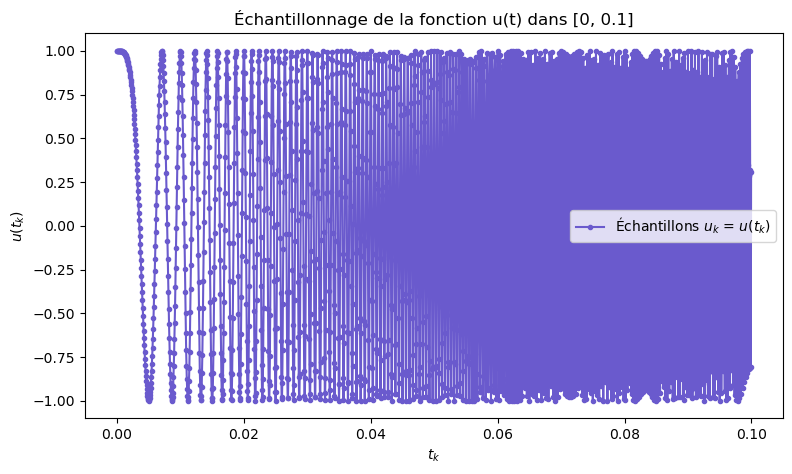

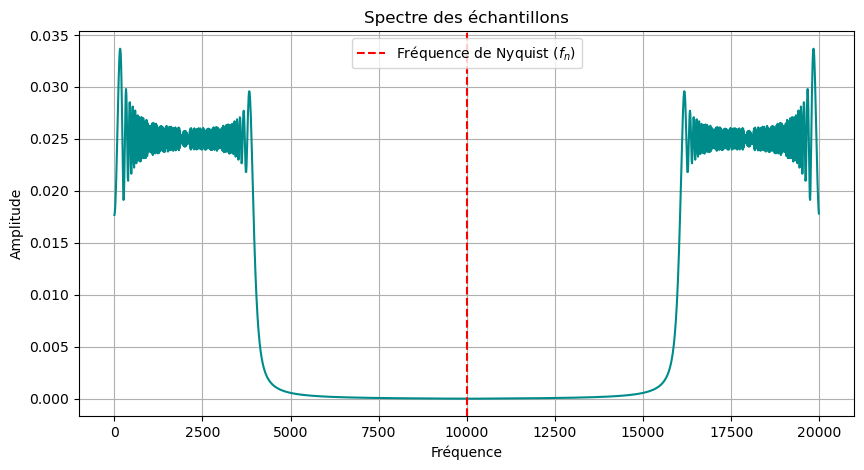

Essai numérique avec a = 20000 et N = 5000 




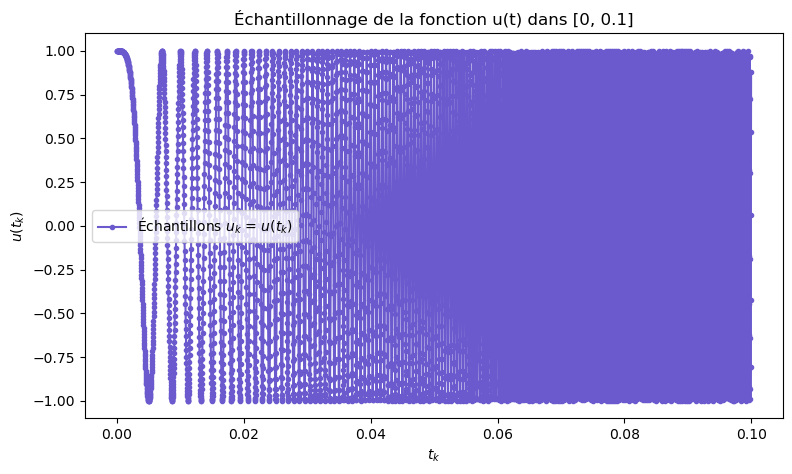

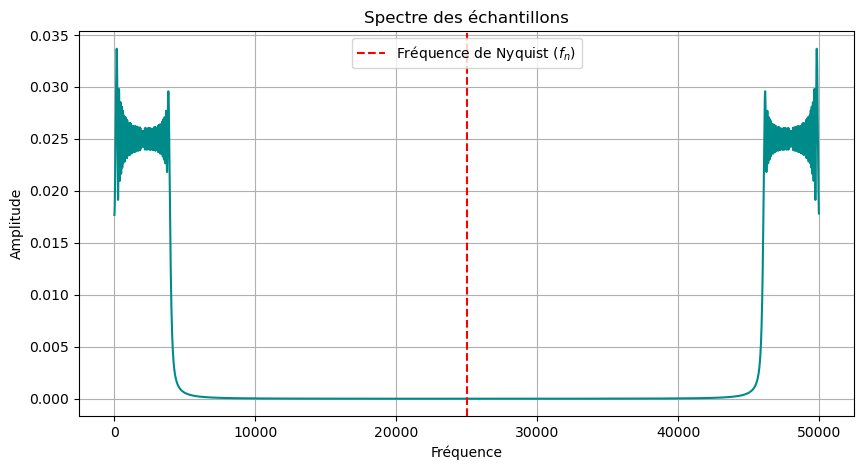

Essai numérique avec a = 40000 et N = 2000 




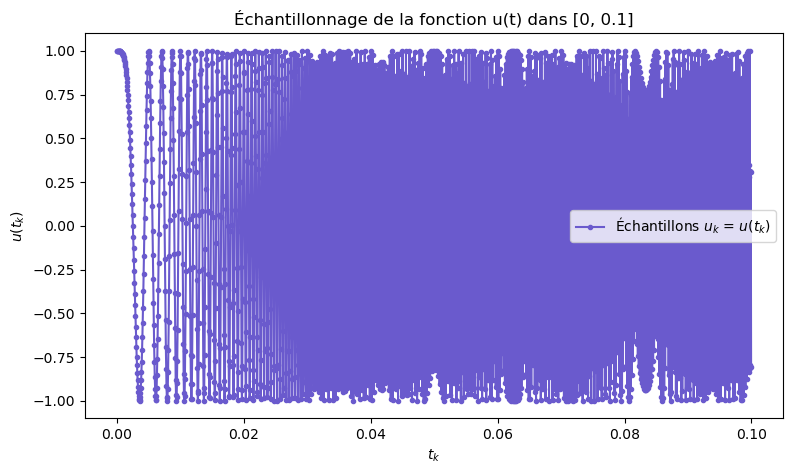

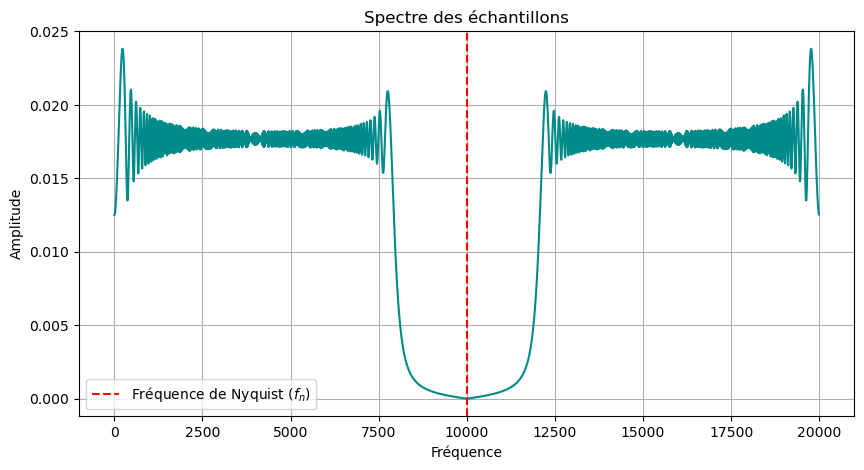

In [4]:
a = 20000   

def u(t):
    return np.cos(2 * np.pi * a * (1 - t**2))  

T = 0.1     
N = 2000  

print(f"Essai numérique avec a = {a} et N = {N} \n\n")
echantillon = echantillonnage(T, u, N)
RepresentationSpectre(echantillon, T)

# Essais avec d'autres valeurs de N et a
for a, N in [(20000, 5000), (40000, 2000)]:
    print(f"Essai numérique avec a = {a} et N = {N} \n\n")
    echantillon = echantillonnage(T, u, N)
    RepresentationSpectre(echantillon, T)

Augmenter le nombre d'échantillons $ N $ améliore la résolution fréquentielle, resserrant ainsi le spectre et permettant une distinction plus nette des différentes composantes fréquentielles.    
En parallèle, augmenter la fréquence du signal $a$ déplace ses composantes fréquentielles vers des valeurs plus élevées dans le spectre. Si la fréquence d'échantillonnage $f_e$ est insuffisante, cela peut conduire à un repliement spectral (aliasing), où les hautes fréquences du signal se superposent à des fréquences plus basses.

Ainsi, la variation de $ N $ ajuste la précision de l'analyse spectrale, tandis que $ a $ modifie l'échelle des fréquences, créant un compromis entre la séparation des composants du signal et la largeur du spectre.


### **Illustration du théorème de Shannon**

Le théorème de Shannon stipule que la fréquence d'échantillonnage $ f_e $ doit être supérieure au double de la fréquence maximale $ f_{\text{max}} $ du signal pour éviter l'aliasing et garantir une reconstruction parfaite. Cela se traduit par :

$$
f_e > 2 \cdot f_{\text{max}}
$$

Dans notre cas, avec $ f_{\text{max}} = 6000 $, la fréquence minimale d'échantillonnage est :

$$
f_e = 2 \cdot 6000 = 12 000 
$$

Ainsi, pour garantir une reconstruction sans aliasing, la fréquence d'échantillonnage $f_e$ doit être strictement supérieure à $ 12000 $. 

Nous allons tester différentes valeurs de $ f_e $ pour observer l'impact sur le signal reconstruit. Si $ f_e \leq 12000 $, on s'attend à ce que l'aliasing se produise, déformant le signal.


Spectre pour $f_{e} = 12000$

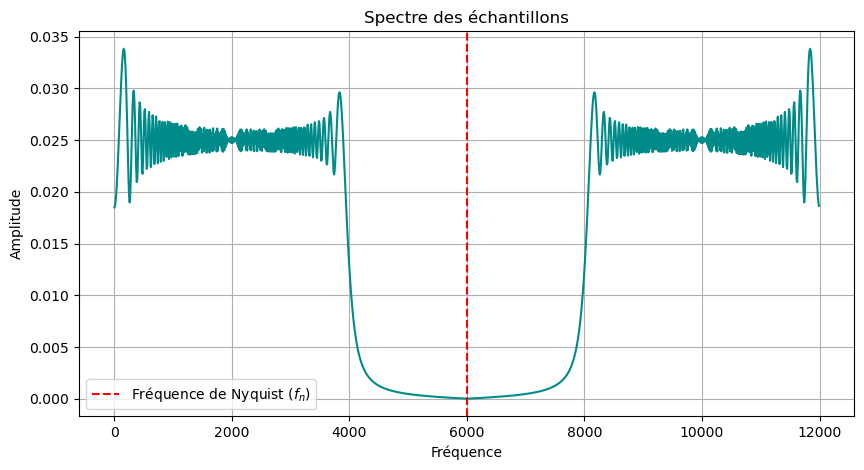

Spectre pour $f_{e} = 16000$

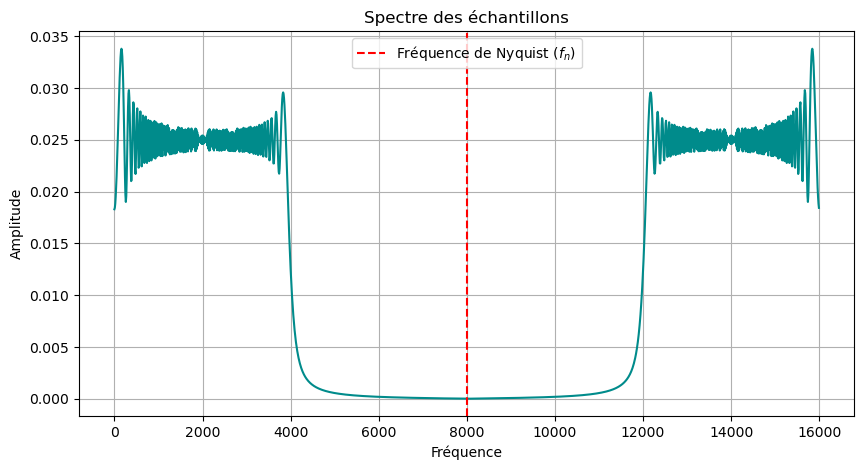

In [5]:
a = 20000  
T = 0.1

def signal(t):
    return np.cos(2 * np.pi * a * (1 - t**2))  

# Fonction d'échantillonnage
def illustration_shannon(T, signal, f_e):
   
    N = int(T * f_e)  
    t = np.linspace(0, T, N)
    echant = signal(t)
        
    display(Markdown(f"Spectre pour $f_{{e}} = {f_e}$"))
    RepresentationSpectre(echant, T)
    
    return echant

fe_list = [12000, 16000]    # = 2*f_max, > 2*f_max
for f_e in fe_list:
    illustration_shannon(T, signal, f_e)

Nous avons testé deux fréquences d'échantillonnage différentes pour le signal, données par :

- **$f_e = 12000$** Hz (= $2 \cdot f_{max}$) :  
  À cette fréquence, l'échantillonnage respecte la condition de Nyquist-Shannon. Le signal est correctement échantillonné sans aliasing, et l'information du signal est théoriquement conservée. Cependant, cela correspond à la limite théorique du théorème de Shannon, et des erreurs mineures peuvent encore apparaître en raison des limitations des filtres analogiques ou numériques.

- **$f_e = 16000$** Hz (> $2 \cdot f_{max}$) :  
  Ici, la fréquence d'échantillonnage est bien supérieure à 2 fois la fréquence maximale du signal. Le signal échantillonné est parfaitement fidèle à l'original, et il est possible de le reconstruire sans aucune perte d'information. Ce cas démontre que le signal peut être échantillonné à une fréquence encore plus élevée, ce qui permet d'élargir la plage fréquentielle analysable sans améliorer directement la fidélité du signal reconstruit.
  

### **5. Impact du sous-échantillonnage**

Évaluons l'impact d'un sous-échantillonnage, c'est-à-dire lorsque le critère du théorème de Shannon n’est pas respecté.
Pour cela, on fixe $N = 300$.


 Spectre pour $f_e = 3000$ (sous-échantillonnage) 

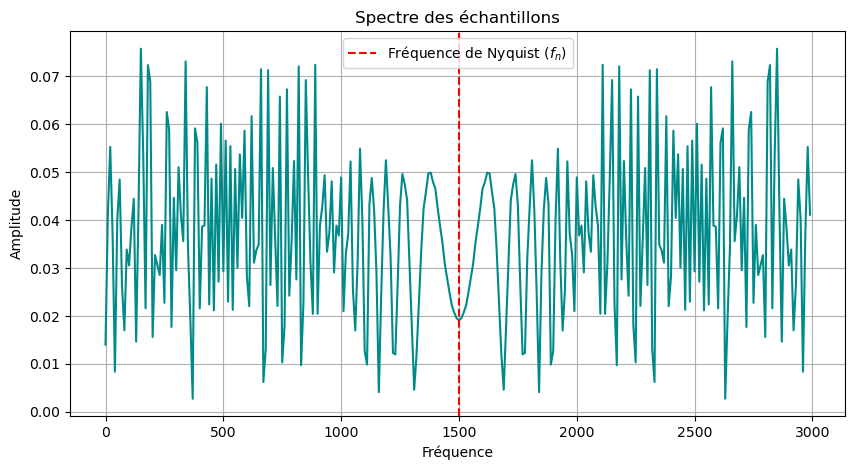

In [6]:
a = 20000  
def signal(t):
    return np.cos(2 * np.pi * a * (1 - t**2))  

T = 0.1
N = 300
f_e = int(N / T)
t = np.linspace(0, T, N)
echant = signal(t)

display(Markdown(f" Spectre pour $f_e = {f_e}$ (sous-échantillonnage) "))
RepresentationSpectre(echant, T)

Dans l'exemple précédent, avec $ T = 0.1 $ et $ N = 300 $, la fréquence d’échantillonnage devient :

$$ f_e = \frac{N}{T} = \frac{300}{0.1} = 3000 $$

Puisque $ f_e = 3000 $ est inférieure à $ 2 \cdot f_{\text{max}} = 12000 $, le critère de Shannon n’est pas respecté. En conséquence :

- Le spectre est replié autour de la fréquence de Nyquist $ f_n = f_e / 2 = 1500 $.
- Les fréquences supérieures à $ f_n $ interfèrent avec celles inférieures, provoquant des distorsions dans le signal.
- Le signal reconstruit n'est plus représentatif du signal d'origine.

Ces observations illustrent clairement l'importance d’un échantillonnage adéquat pour préserver l’intégrité des signaux numériques.


### **Illustration graphique avec un nouveau signal**

Dans cette question, nous analysons un signal défini par :

$$ u(t) = \sin(2 \pi t) $$



### **- Fonction avec deux échantillons**

Étudions les effets de l’échantillonnage sur ce signal en utilisant deux fréquences distinctes : 

- $ f_{e1} = 100 \, \text{Hz} $
- $ f_{e2} = 2.234 \, \text{Hz} $

Pour une durée totale $ T = 40 $, nous représentons graphiquement la fonction continue ainsi que ses échantillons pour ces deux fréquences. Cela permet d'observer les différences entre un échantillonnage respectant largement le théorème de Shannon et un échantillonnage proche de la limite.


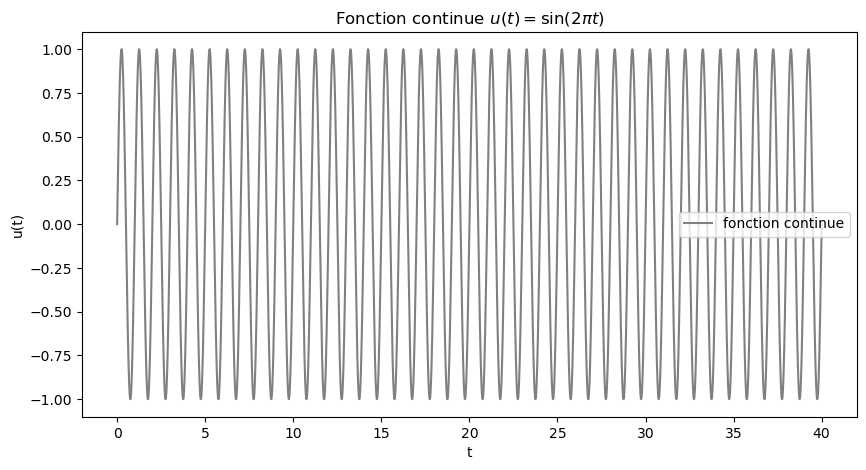

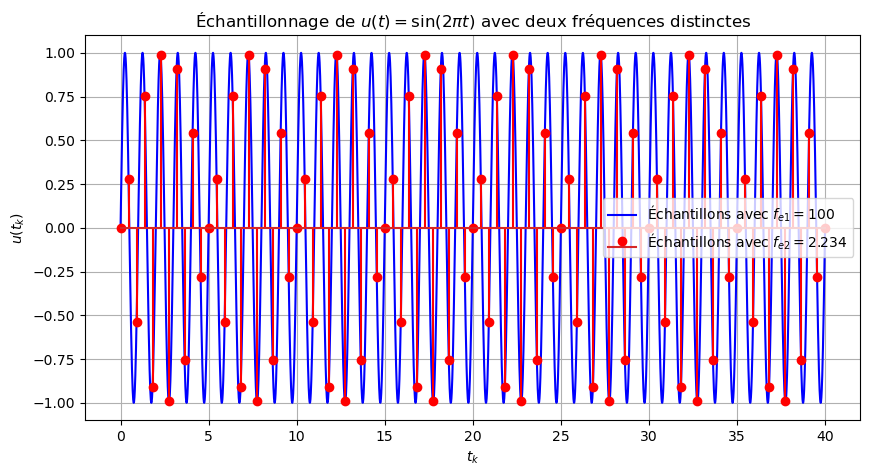

In [7]:
def u(t):
    return np.sin(2 * np.pi * t)

def echantillonnage_selon_f_e(T, u, f_e):    
    
    N = int(T * f_e) 
    t = np.linspace(0, T, N)  
    echantillon = np.array([u(t_k) for t_k in t])

    return t, echantillon

T = 40  
f_e1 = 100
f_e2 = 2.234

# fonction continue
t_continu = np.linspace(0, T, 10000)
u_continu = u(t_continu)

t_1, echantillon_1 = echantillonnage_selon_f_e(T, u, f_e1)
t_2, echantillon_2 = echantillonnage_selon_f_e(T, u, f_e2)

plt.figure(figsize=(10, 5))
plt.plot(t_continu, u_continu, color='gray', label="fonction continue")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title(r"Fonction continue $u(t) = \sin(2 \pi t)$")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_1, echantillon_1, '-', color="blue", label=f"Échantillons avec $f_{{e1}} = {f_e1}$")
plt.stem(t_2, echantillon_2, 'ro', label=f"Échantillons avec $f_{{e2}} = {f_e2}$")
plt.xlabel(f"$t_k$")
plt.ylabel(f"$u(t_k)$")
plt.title(r"Échantillonnage de $u(t) = \sin(2 \pi t)$ avec deux fréquences distinctes")
plt.grid()
plt.legend()
plt.show()

Pour $f_{e1} = 100 $, la fréquence respecte largement le théorème de Shannon ($f_{e1} \gg 2 \cdot f_{\text{max}}$). Les échantillons reproduisent bien le signal continu sans perte d'information.  
Concernant $f_{e2} = 2.234 $, la fréquence est proche de la limite de Nyquist ($f_{e2} \approx 2 \cdot f_{\text{max}}$). Cela entraîne une reconstruction moins précise, notamment en raison de la faible densité des points d’échantillonnage, bien que l'aliasing soit évité grâce au respect du théorème de Shannon.

**Bilan** : Une fréquence d'échantillonnage juste au-dessus de la limite de Nyquist est techniquement suffisante pour éviter l'aliasing, mais elle peut être insuffisante pour garantir une reconstruction précise, notamment pour des signaux plus complexes.


### **- Représentation en reliant les échantillons avec $f_{e2}$**

En reliant les échantillons obtenus avec la fréquence d'échantillonnage $f_{e2} = 2.234$, on obtient la visualisation suivante :

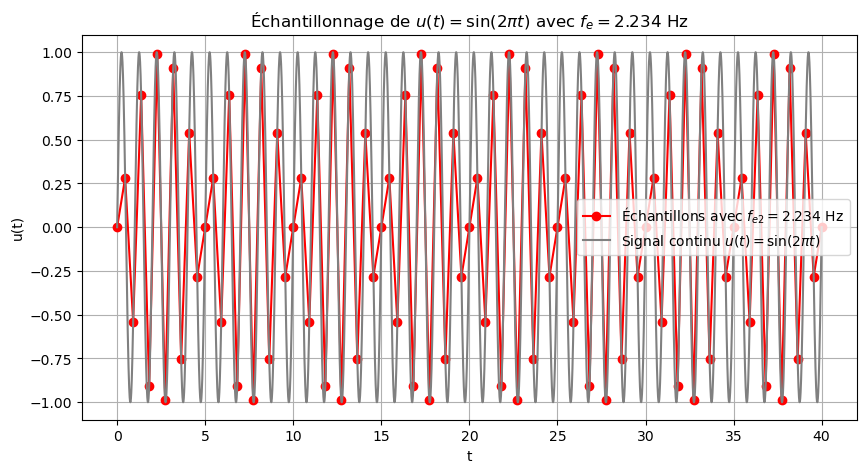

In [8]:
T = 40
f_e2 = 2.234
t_2, echantillon_2 = echantillonnage_selon_f_e(T, u, f_e2)

plt.figure(figsize=(10, 5))
plt.plot(t_2, echantillon_2, 'ro-', label=f"Échantillons avec $f_{{e2}} = {f_e2}$ Hz")
plt.plot(t_continu, u_continu, color='gray', label=r"Signal continu $u(t) = \sin(2 \pi t)$")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title(r"Échantillonnage de $u(t) = \sin(2 \pi t)$ avec $ f_e = 2.234 $ Hz")
plt.legend()
plt.grid()
plt.show()

La fonction obtenue par l'interpolation des échantillons avec $f_{e2}$ présente des écarts notables par rapport au signal original $u(t)$. On en déduit que, malgré que le théorème de Shannon soit satisfait théoriquement, des limitations pratiques peuvent entraîner une perte de précision et une distorsion dans la reconstruction. 

###  **- Représentation graphique du spectre**

Affichons le spectre des échantillons obtenus avec la fréquence d'échantillonnage $f_{e2} = 2.234$.


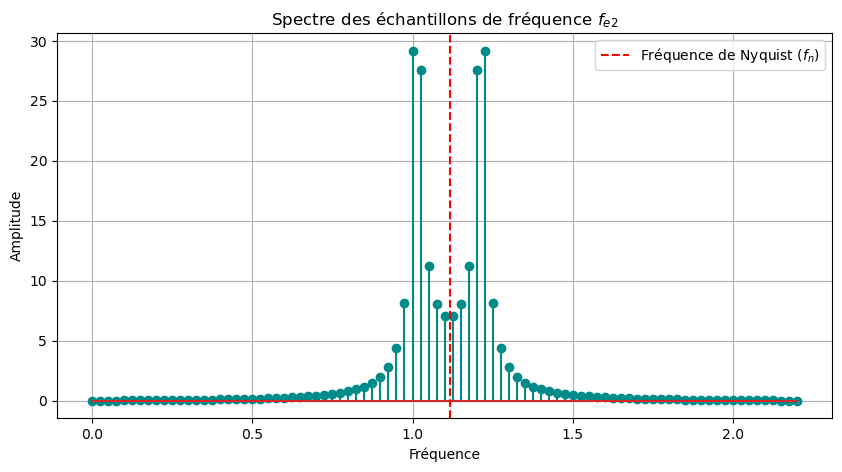

In [9]:
T = 40 
f_e2 = 2.234  
t, echantillon_2 = echantillonnage_selon_f_e(T, u, f_e2)

N2 = int(T * f_e2) 
f_n = f_e2 / 2                  
    
frequence = np.arange(N2)*1.0 / T   
DFT = np.fft.fft(echantillon_2)              
spectre = np.abs(DFT)
    
plt.figure(figsize=(10, 5))
plt.stem(frequence, spectre, linefmt='darkcyan')
plt.axvline(x = f_n, color="red", linestyle="--", label=r"Fréquence de Nyquist ($f_n$)")
plt.title(r"Spectre des échantillons de fréquence $f_{e2}$")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show() 


Les pics du spectre se situent à $ f = 1 $ et à la fréquence image $ f = 2.234 - 1 $. Le respect du théorème de Shannon garantit une préservation correcte de la fréquence principale sans distorsion majeure. Cependant, la proximité de la limite de Nyquist peut entraîner une légère déformation ou atténuation des pics.


### **- Augmentation de la fréquence d'échantillonnage et reconstruction du signal**

Une technique pour améliorer la représentation d'un signal sous-échantillonné consiste à augmenter artificiellement la fréquence d'échantillonnage en ajoutant des zéros au milieu du vecteur des coefficients de la DFT, puis à appliquer la DFT inverse.

En voici une implémentation :

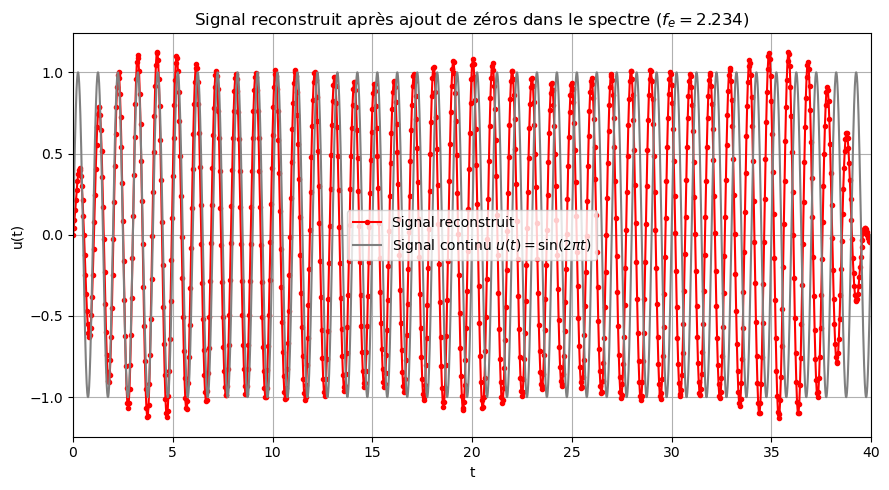

In [10]:
t2, echantillon_2 = echantillonnage_selon_f_e(T, u, f_e2)
vecteur_DFT = np.fft.fft(echantillon_2)
N2 = len(echantillon_2)

DFT_1 = vecteur_DFT[0 : N2//2]
DFT_2 = vecteur_DFT[N2//2 : N2]

taille_milieu = 1000
N3 = N2 + taille_milieu
zeros = np.zeros(taille_milieu)
nouveau_vecteur = np.concatenate((DFT_1,zeros,DFT_2))
f_e3 = N3 / T

echantillon_reconstruit = np.fft.ifft(nouveau_vecteur).real
# Normalisation pour conserver l'amplitude originale
echantillon_reconstruit *= N3 / N2

t_reconstruit = np.linspace(0, T, len(echantillon_reconstruit))

figure(figsize=(9, 5))
plt.plot(t_reconstruit, echantillon_reconstruit, 'ro-', label='Signal reconstruit', markersize=3)
plt.plot(t_continu, u_continu, color='gray', label=r"Signal continu $u(t) = \sin(2 \pi t)$")
plt.title(f"Signal reconstruit après ajout de zéros dans le spectre ($f_e = 2.234$)")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.grid()
plt.xlim(0, T)
plt.tight_layout()
plt.show()

En ajoutant des zéros au milieu du spectre, on augmente la résolution en fréquence, ce qui permet de mieux représenter le signal à une fréquence d'échantillonnage plus élevée, même sans augmenter réellement cette dernière. 
Le signal reconstruit est bien plus proche de l'original, avec moins de distorsion et une meilleure continuité.   
À noter qu'une normalisation a été appliquée pour corriger la réduction d'amplitude due à l'ajout de zéros, améliorant ainsi la précision et la continuité du signal.


### **Illustration du repliement de la bande**

Le repliement de la bande (aliasing) se produit lorsque la condition de Nyquist-Shannon n'est pas respectée. 

Dans cette section, nous considérons la fonction $u(t) = \sin(2 \pi t)$ définie sur l'intervalle $[0, 40]$. Nous allons échantillonner ce signal avec une fréquence $f_e = 1.51$, qui est en dessous du seuil requis $2 \cdot f_{\text{max}} = 2$. 


### **- Signal continu et ses échantillons**

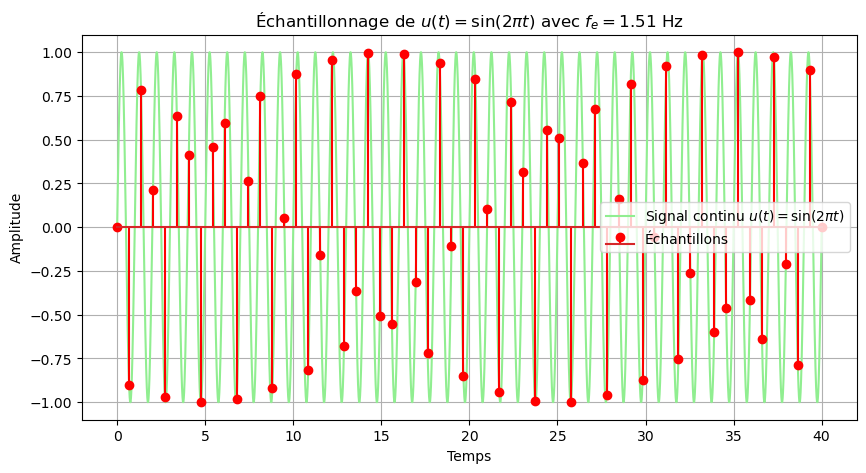

In [11]:
T = 40 
f_e = 1.51  
t_k, u_k = echantillonnage_selon_f_e(T, u, f_e)

t_continu = np.linspace(0, T, 10000)  
u_continu = u(t_continu)

plt.figure(figsize=(10, 5))
plt.plot(t_continu, u_continu, '-', color="lightgreen", label=r"Signal continu $u(t) = \sin(2\pi t)$")
plt.stem(t_k, u_k, 'ro-', label='Échantillons')
plt.title(r"Échantillonnage de $u(t) = \sin(2\pi t)$ avec $f_e = 1.51$ Hz")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

### **- Spectre des échantillons**

Le graphique suivant montre le spectre des échantillons obtenus avec $f_e = 1.51$.

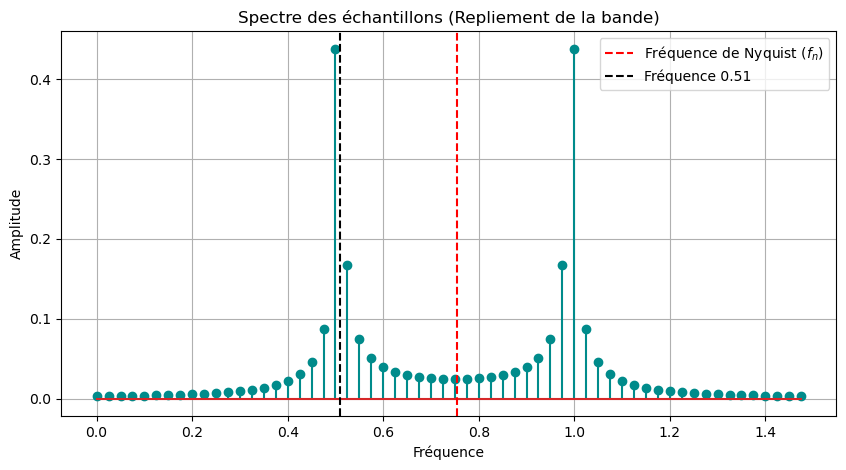

In [12]:
T = 40           
fe_bande = 1.51
f_n = fe_bande / 2
te = 1.0 / fe_bande

N = int(T * fe_bande)
t = np.zeros(N)
echant = np.zeros(N)

for k in range(N):
    t[k] = k * te
    echant[k] = u(t[k])

DFT = np.fft.fft(echant)
spectre = np.abs(DFT/N)
freq = np.arange(0,N) * 1.0 / T

plt.figure(figsize=(10, 5))
plt.stem(freq, spectre, linefmt='darkcyan')
plt.axvline(x = f_n, color="r", linestyle="--", label=r"Fréquence de Nyquist ($f_n$)")
plt.axvline(x = 0.51, color='k', linestyle='--', label="Fréquence 0.51")
plt.title("Spectre des échantillons (Repliement de la bande)")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

Le spectre obtenu, bien que symétrique par rapport à la fréquence de Nyquist, ne correspond pas au spectre du signal continu.  
En effet, les pics se trouvent à des fréquences incorrectes en raison du repliement. Au lieu d’un pic à la fréquence $ f = 1 $ (fréquence du signal continu), nous observons un pic déplacé vers une fréquence plus basse.  
L'information spectrale originale du signal est donc perdue, rendant impossible une reconstruction fidèle.

L'apparition de la basse fréquence parasite à $ f = 0.51 $ résulte du **repliement de la bande** (aliasing), causé par un sous-échantillonnage, avec $ f_e = 1.51 $ inférieure au seuil de Nyquist ($ 2 \cdot f_{\text{max}} = 2 $).

La fréquence originale $ f = 1 $, située au-delà de la fréquence de Nyquist ($ f_n = f_e / 2 = 0.755 $), est repliée dans la bande analysable selon la relation :

$$
f_{\text{repliée}} = |f_{\text{original}} - f_e| = |1 - 1.51| = 0.51.
$$

La basse fréquence entraîne une perte d'information et un ajout d'éléments non présents dans le signal d'origine.

---


## **Partie 2 / _Filtres_**  
  

Dans cette partie, nous partons d'un signal analogique $x(t)$ échantilloné avec une période $t_e$, ce qui fournit un signal numérique $x[n] = x(n \cdot t_e).$
Un filtre à **réponse impulsionnelle finie** RIF calcule un signal de sortie $y[n]$ donné par :

$$ y[n] = \sum_{k=0}^{N-1} h[k] \cdot x[n-k] $$

où les $h[k]$ sont les coefficients du filtre. 
La **réponse fréquentielle**, induisant le signal de sortie, est donnée par : 

$$ H_e(f) = \sum_{k=0}^{N-1} h[k] \cdot \exp^{-2 \pi i k \frac{f}{f_e}} $$ 

Cette réponse, périodique de $f_e$, dépend du rapport $\frac{f}{f_e}$, qui doit être inférieur à $\frac{1}{2}$ selon le théorème de Shannon.


###  **Réponse fréquentielle**

Commençons par implémenter une fonction `ReponseFrequence(b,nf)` qui calcule :
1. Le module $ |H_e(f)| $, représentant l'amplitude de la réponse fréquentielle.
2. L'argument $ Arg(H_e(f)) $, représentant la phase de la réponse fréquentielle.

Cette réponse sera évaluée en $nf$ points répartis uniformément sur l'intervalle $[0, 0.5]$.

In [13]:
def ReponseFrequence(b, nf):
    
    f_sur_fe = np.linspace(0, 0.5, nf)    
    H_e = np.zeros(nf, dtype=complex)
    
    for i, f_i in enumerate(f_sur_fe): 
        for k in range(len(b)):  
            H_e[i] += b[k] * np.exp(-2j * np.pi * k * f_i)  
    
    module = np.abs(H_e)
    argument = np.unwrap(np.angle(H_e))
    
    return module, argument

### **Débruitage d'un signal à l'aide de filtres**

On considère le signal

$$ s(t) = cos(2 \pi t) + 0.5 \cdot cos(6 \pi t + \frac{\pi}{3}) + 0.2 \cdot cos(10 \pi t + \frac{\pi}{5}) + 0.2 \cdot cos(20 \pi t) $$

échantillonné à une fréquence $f_e$ dans l'intervalle $[0,T]$. On rajoute également un bruit gaussien à ce signal. 

### **- Représentation graphique du signal avec $T = 2.0$ et $f_e = 500$**

Pour cet exemple, les paramètres utilisés sont les suivants :
- $T = 2.0$
- $f_e = 500$

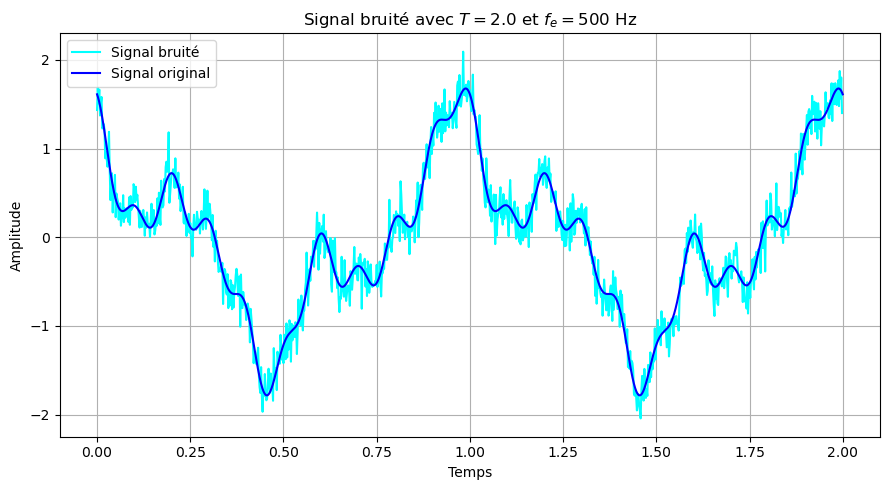

In [14]:
T = 2.0  
f_e = 500  
N = int(T * f_e)  
t_e = T/N

t_discret = np.arange(0, T, t_e)
t_continu = np.linspace(0, T, 10000) 

# signal d'origine
def s(t):
    return ( np.cos(2 * np.pi * t) + 0.5 * np.cos(6 * np.pi * t + np.pi/3) \
     + 0.2 * np.cos(10 * np.pi * t + np.pi/5) + 0.2 * np.cos(20 * np.pi * t) )


s_bruit = [s(k * t_e) + random.gauss(0, 0.15) for k in range(N)]

plt.figure(figsize=(9, 5))
plt.plot(t_discret, s_bruit, label="Signal bruité", color="cyan")
plt.plot(t_continu, s(t_continu), label="Signal original", color="blue")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.title("Signal bruité avec $T=2.0$ et $f_e=500$ Hz")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Le graphique obtenu montre le signal original accompagné de sa version bruitée échantillonnée dans l'intervalle $[0, T]$.   
La perturbation est générée par un bruit gaussien avec un écart-type de $ 0.15 $. Ce bruit rend le signal plus difficile à analyser, mettant en évidence la nécessité d'un filtre pour le débruiter.

###  **- Spectre du signal discret et amplitude dans $[0, \frac{f_e}{2}]$**

Pour analyser le contenu fréquentiel du signal bruité, nous calculons son spectre à l'aide de la DFT. Nous représentons l'amplitude du spectre en décibels ($10 \log_{10}(|X[k]|)$) sur l'intervalle fréquentiel $[0, f_e / 2]$.  

Le spectre fournit des informations sur les fréquences présentes dans le signal et leur puissance relative, permettant d'identifier les composantes utiles (les fréquences définies dans $s(t)$) et celles dues au bruit.  


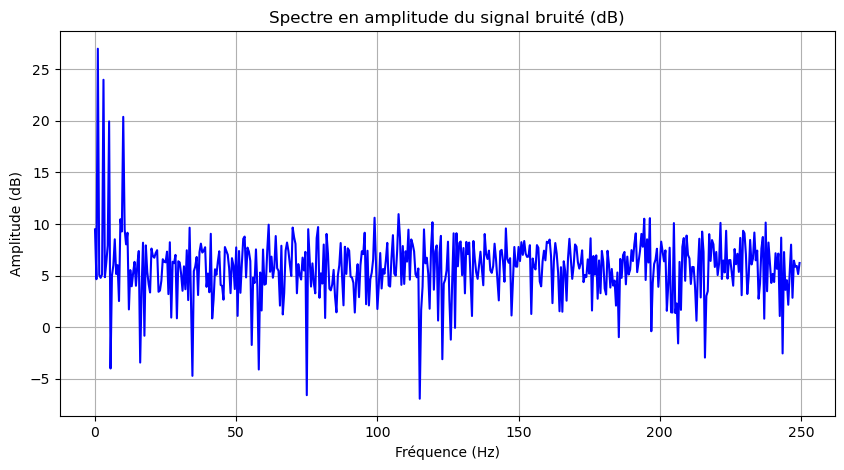

In [15]:
DFT_s_bruit = np.fft.fft(s_bruit)
frequences = np.fft.fftfreq(N, d=1/f_e)

# partie positive du spectre
positives = frequences >= 0
frequences = frequences[positives]
DFT_s_bruit = DFT_s_bruit[positives]

amplitude_dB = 10 * np.log10(np.abs(DFT_s_bruit))

#Représentation graphique du spectre en dB
plt.figure(figsize=(10, 5))
plt.plot(frequences, amplitude_dB, color="blue")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude (dB)")
plt.title("Spectre en amplitude du signal bruité (dB)")
plt.grid()
plt.show()

Le spectre met en évidence les pics aux fréquences correspondant aux composantes principales du signal :  
- $f = 1 \, \text{Hz} \, $ pour $ (\cos(2\pi t))$  
- $f = 3 \, \text{Hz} \, $ pour $ (0.5\cos(6\pi t + \pi/3))$  
- $f = 5 \, \text{Hz} \, $ pour $ (0.2\cos(10\pi t + \pi/5))$  
- $f = 10 \, \text{Hz} \, $ pour $ (0.2\cos(20\pi t))$

Le reste du spectre est principalement composé de bruit, réparti de manière large en fréquence. Le sur-échantillonnage (avec $ f_e = 500 $) permet d'éviter l'aliasing et de mieux isoler les fréquences utiles, facilitant ainsi le filtrage du bruit.


###  **- Filtre moyenneur**


On applique ici un filtre moyenneur défini par la relation :  

$$ y[n] = \frac{x[n] + x[n-1]}{2} $$

### $\hspace{0.4cm}$ **i) Module et argument de la réponse fréquentielle**


Le filtre moyenneur est défini par les coefficients suivants :  

$$  h[n] = 
\begin{cases} 
\frac{1}{2} & \text{si } n = 0 \\ 
\frac{1}{2} & \text{si } n = 1 \\ 
0 & \text{sinon.} 
\end{cases} $$

Ces coefficients traduisent une moyenne glissante sur deux échantillons consécutifs.

Sa réponse fréquentielle est alors obtenue comme : 

$$ H_e(f) = \frac{1}{2} \left( 1 + e^{-2i\pi f / f_e} \right) $$


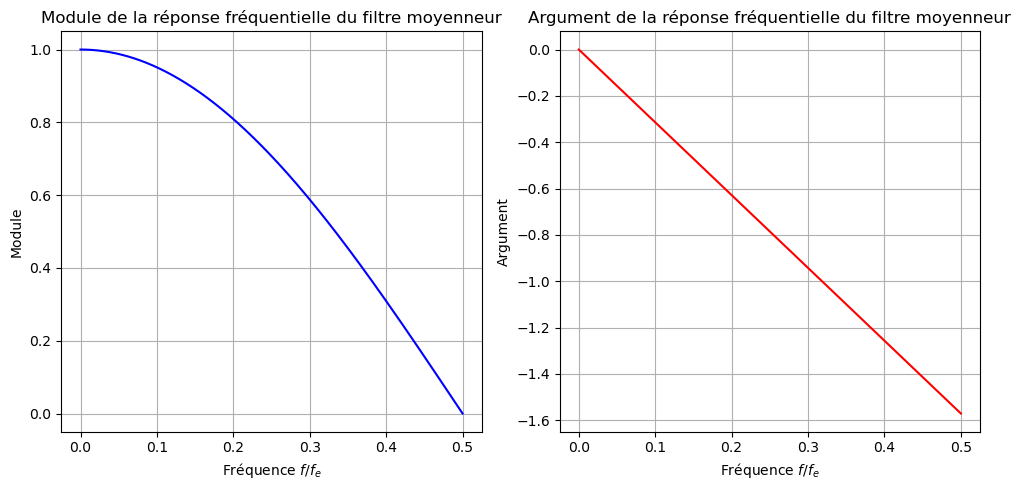

In [16]:
nf = 512  
f_sur_fe = np.linspace(0, 0.5, nf)   
h = np.array([0.5, 0.5]) 

module, argument = ReponseFrequence(h, nf)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(f_sur_fe, module, 'b-')
plt.xlabel(f"Fréquence $ f / f_e $")
plt.ylabel("Module")
plt.title("Module de la réponse fréquentielle du filtre moyenneur")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(f_sur_fe, argument, 'r-')
plt.xlabel(f"Fréquence $ f / f_e $")
plt.ylabel("Argument")
plt.title("Argument de la réponse fréquentielle du filtre moyenneur")
plt.grid()

plt.tight_layout()
plt.show()

###  $\hspace{0.4cm}$ **ii) Caractéristiques du filtre**

Les caractéristiques du filtre moyenneur ont été tracées en fonction du rapport $\frac{f}{f_e} \in [0, 0.5]$.  
- Le module montre une diminution progressive des fréquences élevées, confirmant le comportement passe-bas du filtre.
- L'argument illustre la variation de phase introduite par le filtre, avec une pente typique des filtres à réponse impulsionnelle finie.

Ces propriétés sont essentielles pour atténuer les hautes fréquences, comme le bruit, tout en préservant les basses fréquences utiles du signal.


### $\hspace{0.4cm}$ **iii) Représentation du signal discret filtré**

Nous appliquons ici le filtre moyenneur au signal discret échantillonné. 
Le filtre est défini par sa réponse impulsionnelle $ h[n] = [\frac{1}{2}, \frac{1}{2}] $.
La convolution entre ce filtre et le signal est calculée à l'aide de la fonction `scipy.signal.convolve`. 
On s'assure de tenir compte du fait que le premier point du signal filtré correspond à $ t = t_e $, en raison de la dépendance au retard $ x[n-1] $.

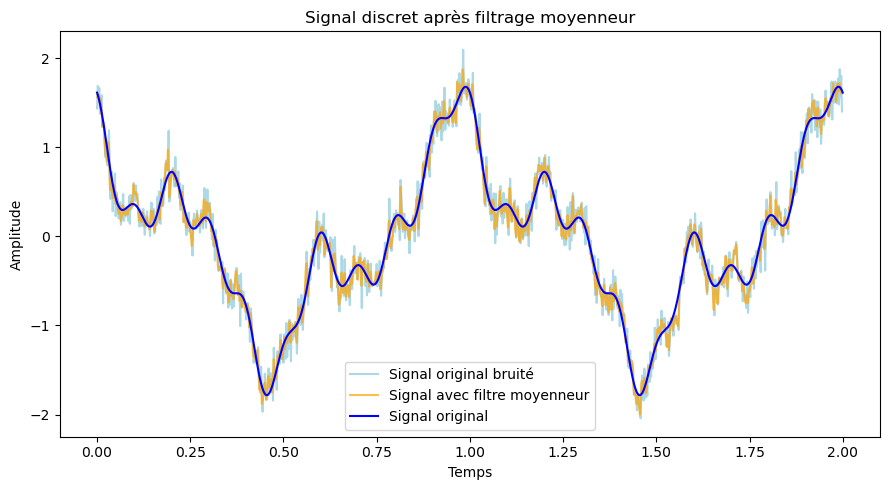

In [17]:
import scipy.signal
from scipy.signal import convolve

# Réponse impulsionnelle filtre moyenneur
h = np.array([0.5, 0.5])

# Application filtre moyenneur
s_filtre_moyenneur = convolve(s_bruit, h, mode='valid')
taille = s_filtre_moyenneur.size
t = np.arange(taille) * t_e

plt.figure(figsize=(9, 5))
plt.plot(t_discret, s_bruit, label="Signal original bruité", color="lightblue")
plt.plot(t, s_filtre_moyenneur, label="Signal avec filtre moyenneur", color="orange", alpha=0.7)
plt.plot(t_continu, s(t_continu), label="Signal original", color="blue")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.title("Signal discret après filtrage moyenneur")
plt.legend()

plt.tight_layout()
plt.show()

Le signal filtré présente une atténuation du bruit haute fréquence superposé au signal d'origine. Le filtre moyenneur, agissant comme un **passe-bas**, lisse les variations rapides tout en conservant les basses fréquences principales du signal, correspondant aux composantes dominantes identifiées dans le spectre (par exemple, $ f = 1 $ et $ f = 3 $).  
Toutefois, cette méthode peut introduire une légère perte d'amplitude des composantes utiles du signal.

###  **- Filtre passe-bas gaussien**

Le filtre passe-bas gaussien a une réponse impulsionnelle définie par :

$$ f(t) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( - \frac{t^2}{2 \sigma^2} \right) $$
où $\sigma = \frac{Q}{\sqrt{-2 \log(\epsilon)}}$ et $N = 2Q + 1$. 


### $\hspace{0.4cm}$ **i) Module et argument de la réponse fréquentielle**

Nous définissons la fonction :
- $gaussienne(Q, epsilon)$ calculant la réponse impulsionnelle $f(k-Q)$ du filtre passe-bas gaussien. 

On pense également à normaliser cette dernière.

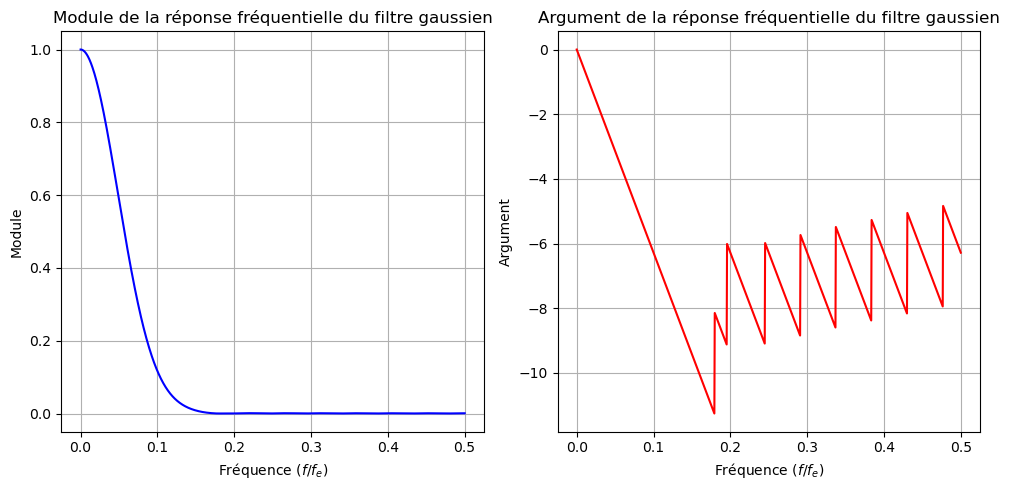

In [18]:
def gaussienne(Q, epsilon):
    
    sigma = Q / np.sqrt(-2 * np.log(epsilon))
    N = 2 * Q + 1  # longueur du filtre 
    
    g = np.zeros(N)
    somme = 0
    for k in range(N):
        g[k] = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (k - Q)**2 / (2 * sigma**2))
        somme += g[k]
    g /= somme   # normalisation réponse impulsionnelle
    
    return g

nf = 1000
Q = 10
epsilon = 0.01
f_sur_fe = np.linspace(0, 0.5, nf)    

g = gaussienne(Q, epsilon)
module, argument = ReponseFrequence(g, nf)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(f_sur_fe, module, color='blue')
plt.xlabel("Fréquence ($f / f_e$)")
plt.ylabel("Module")
plt.title("Module de la réponse fréquentielle du filtre gaussien")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(f_sur_fe, argument, color='red')
plt.xlabel("Fréquence ($f / f_e$)")
plt.ylabel("Argument")
plt.title("Argument de la réponse fréquentielle du filtre gaussien")
plt.grid()

plt.tight_layout()
plt.show()


Ci-dessus les résultats obtenus pour $Q = 10$ et $ \epsilon = 0.01 $.


### $\hspace{0.4cm}$ **ii) Caractéristiques du filtre**

Le module de la réponse fréquentielle diminue progressivement, montrant une atténuation efficace des hautes fréquences, ce qui confirme le comportement passe-bas du filtre. L'argument de la réponse fréquentielle décroît linéairement dans un premier temps, avant de croître avec des oscillations rapides, traduisant des variations en phase dues aux propriétés du filtre gaussien.

Le filtre passe-bas gaussien présente une meilleure sélectivité en fréquence que le filtre moyenneur, avec une atténuation plus efficace des hautes fréquences. Son module montre une transition plus douce entre les basses et hautes fréquences. Par rapport au filtre moyenneur, le filtre gaussien conserve mieux la forme des basses fréquences tout en éliminant le bruit.



### $\hspace{0.4cm}$ **iii) Signal discret filtré**

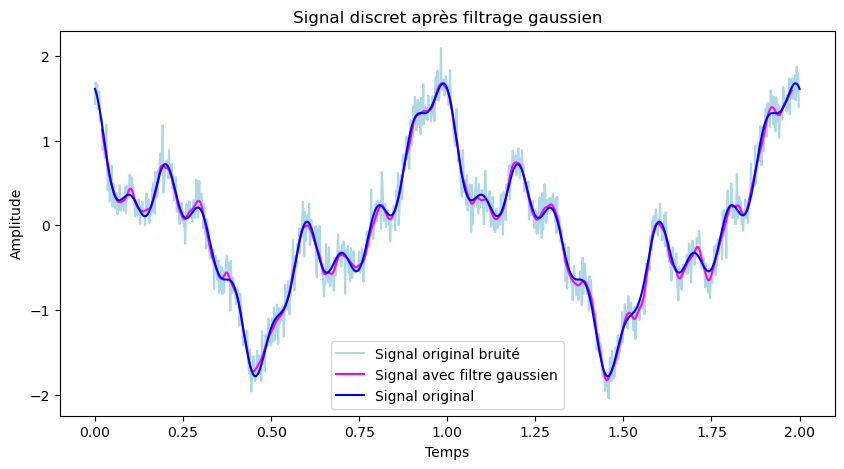

In [19]:
# Paramètres filtre passe-bas gaussien
epsilon = 0.01
Q = 10
reponse_impuls_passe_bas = gaussienne(Q, epsilon)

# Application du filtre 
s_filtre_passe_bas = convolve(s_bruit, reponse_impuls_passe_bas, mode='valid')
taille = s_filtre_passe_bas.size
t = (np.arange(taille) + Q) * t_e

plt.figure(figsize=(10, 5))
plt.plot(t_discret, s_bruit, label='Signal original bruité', color='lightblue')
plt.plot(t, s_filtre_passe_bas, label='Signal avec filtre gaussien', color='magenta')
plt.plot(t_continu, s(t_continu), label="Signal original", color="blue")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.title("Signal discret après filtrage gaussien")
plt.legend()
plt.show()

Après filtrage, le signal apparaît plus lisse et le bruit est significativement réduit par rapport au signal d'origine bruité. 
Contrairement au filtre moyenneur, le filtre gaussien conserve mieux les variations rapides et les amplitudes proches du signal original, tout en éliminant efficacement le bruit de haute fréquence.

## **- Filtre sinc**

Le filtre basé sur un sinus cardinal $ (\text{sinc}) $ est défini par sa réponse impulsionnelle : 

$$ b[k] = 2a \cdot \text{sinc}(2(k-Q)a) $$ 

où $ a = \frac{f_c}{f_e} $ (avec $ f_c $ la fréquence de coupure) et $ Q $ centre la réponse impulsionnelle sur une longueur $ N = 2Q + 1 $.

Programmons ce filtre et comparons le avec le précédent basé sur le passe-bas gaussien.

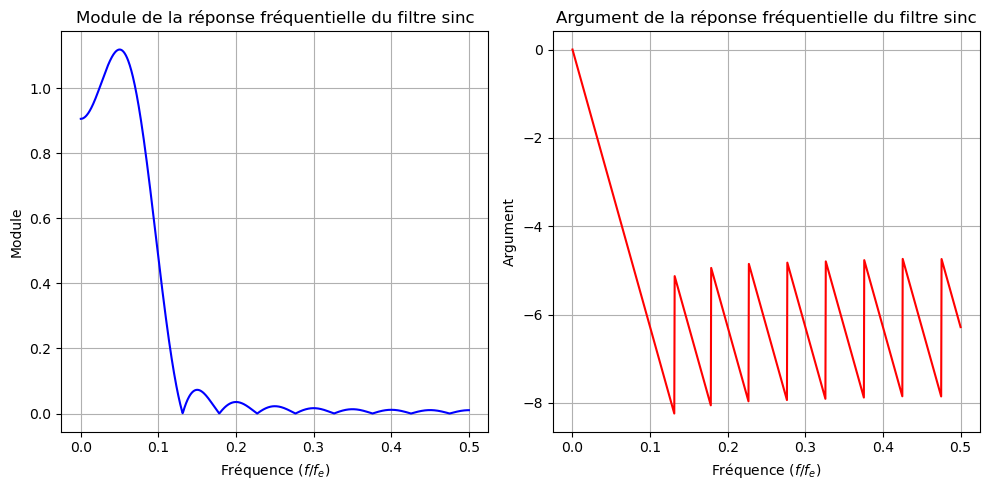

In [20]:
# Paramètres du filtre sinc
Q = 10
f_c = 50  # fréquence coupure 
a = f_c / f_e
N = 2*Q + 1
b_k_sinc = np.zeros(N)

# Réponse impulsionnelle filtre sinc
for k in range(N):
    b_k_sinc[k] = 2 * a * np.sinc(2 * (k-Q) * a)  
    
module, argument = ReponseFrequence(b_k_sinc, nf)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(f_sur_fe, module, color='blue')
plt.xlabel("Fréquence ($f / f_e$)")
plt.ylabel("Module")
plt.title("Module de la réponse fréquentielle du filtre sinc")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(f_sur_fe, argument, color='red')
plt.xlabel("Fréquence ($f / f_e$)")
plt.ylabel("Argument")
plt.title("Argument de la réponse fréquentielle du filtre sinc")
plt.grid()

plt.tight_layout()
plt.show()

Le filtre sinc est nettement plus sélectif que le filtre gaussien, avec une transition plus brusque entre la bande passante et la bande atténuée. Cependant, cette sélectivité accrue s'accompagne d'ondulations notables dans la bande passante et dans la bande atténuée, dues à la nature oscillatoire du sinus cardinal. L'argument, en revanche, reste quasi-linéaire dans la bande passante, ce qui garantit une bonne conservation de la forme des signaux pour cette plage de fréquences.



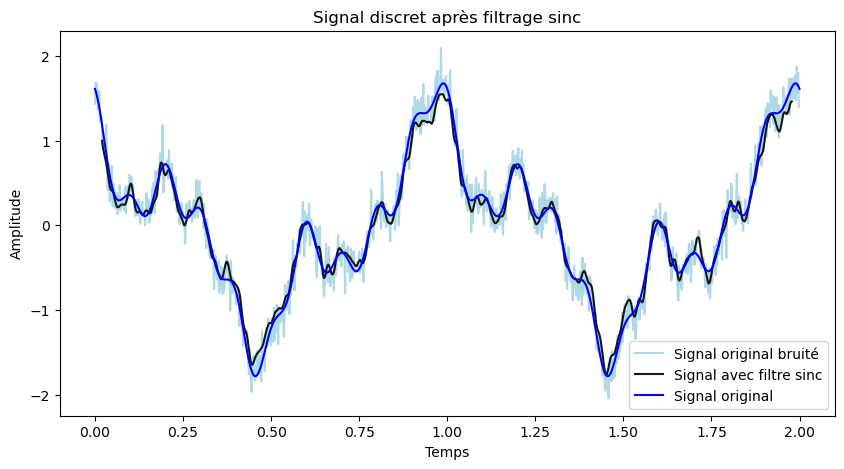

In [21]:
# Application du filtre sinc
s_filtre_sinc = convolve(s_bruit, b_k_sinc, mode='valid')
taille = s_filtre_sinc.size
t = (np.arange(taille) + Q) * t_e

# Graphique
plt.figure(figsize=(10, 5))
plt.plot(t_discret, s_bruit, label='Signal original bruité', color='lightblue')
plt.plot(t, s_filtre_sinc, label='Signal avec filtre sinc', color='black', alpha=0.9)
plt.plot(t_continu, s(t_continu), label="Signal original", color="blue")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.title("Signal discret après filtrage sinc")
plt.legend()
plt.show()

Le filtre sinc est moins efficace que le filtre gaussien pour réduire le bruit, en raison des ondulations présentes dans la bande atténuée. 
Ces rebonds laissent subsister une partie du bruit haute fréquence, ce qui peut altérer légèrement la qualité du signal filtré. 
Cependant, le filtre conserve une bonne précision dans la restitution des fréquences utiles, grâce à sa sélectivité plus marquée. 
Ce compromis le rend adapté pour des applications où la fidélité des basses fréquences est prioritaire sur la réduction totale du bruit.

### **- Filtre dérivateur**

Passons désormais à l'étude du filtre dérivateur, défini par :  
$$ y[n] = \frac{1}{t_e} \cdot \left( x[n] - x[n-1] \right) $$ 


### $\hspace{0.4cm}$ **i) Réponse fréquentielle**

La réponse impulsionnelle du filtre vaut :  
$$ h[n] = 
\begin{cases} 
\frac{1}{t_e} & \text{si } n = 0 \\ 
-\frac{1}{t_e} & \text{si } n = 1 \\ 
0 & \text{sinon.} 
\end{cases}
$$

On peut ainsi écrire sa réponse fréquentielle comme :
$$ H_e(f) = \frac{1}{t_e} \left( 1 - e^{-2i\pi f / f_e} \right) $$

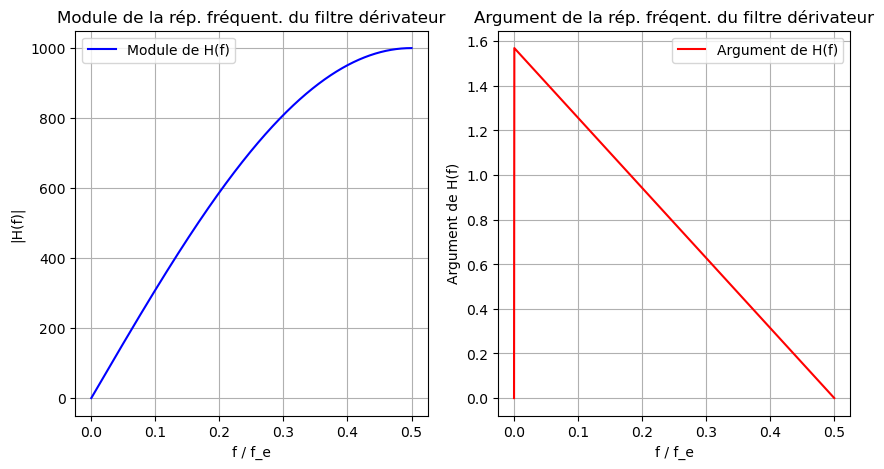

In [22]:
nf = 1000
f_e = 500  

reponse_impuls_derivateur = np.array([1, -1]) / t_e  
module, argument = ReponseFrequence(reponse_impuls_derivateur, nf)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(f_sur_fe, module, label='Module de H(f)', color='blue')
plt.xlabel('f / f_e')
plt.ylabel('|H(f)|')
plt.title('Module de la rép. fréquent. du filtre dérivateur')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f_sur_fe, argument, label='Argument de H(f)', color='red')
plt.xlabel('f / f_e')
plt.ylabel('Argument de H(f)')
plt.title('Argument de la rép. fréqent. du filtre dérivateur')
plt.grid()
plt.legend()

plt.show()

- **Module** : Le gain croît de manière constante avec la fréquence, indiquant que le filtre dérivateur accentue les transitions rapides du signal en amplifiant les hautes fréquences. Cependant, appliqué seul à un signal bruité, il peut exagérer le bruit.
- **Argument** : La phase présente un saut au début, puis décroît linéairement avec la fréquence. Ce comportement peut provoquer une distorsion dans le signal filtré, tout en conservant une variation prévisible dans la bande de fréquences. 


### $\hspace{0.4cm}$ **ii) Signal discret filtré**

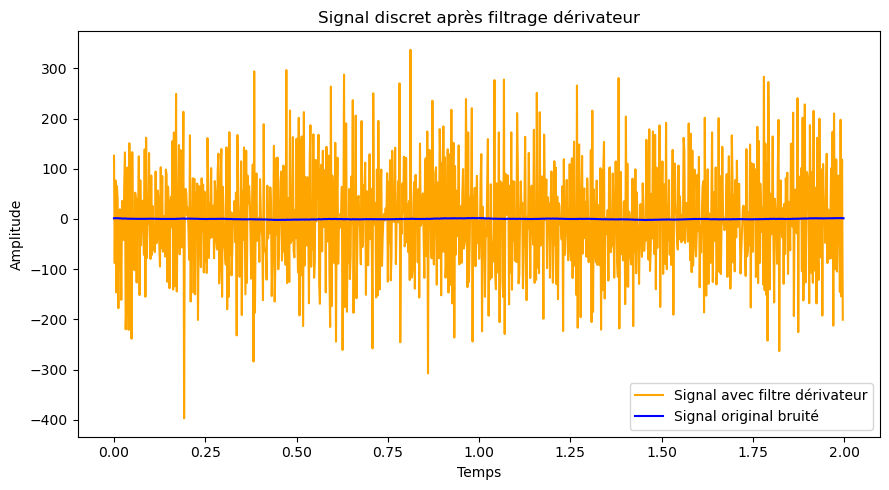

In [23]:
T = 2.0
f_e = 500
t_e = 1 / f_e
N = int(T * f_e)

t_discret = np.arange(0, T, t_e)
t_continu = np.linspace(0, T, 10000) 

reponse_impuls_derivateur = np.array([1, -1]) / t_e  

s_filtre_derivateur = convolve(s_bruit, reponse_impuls_derivateur, mode='valid')
ny = s_filtre_derivateur.size
ty = np.arange(ny) * t_e

plt.figure(figsize=(9, 5))
plt.plot(ty, s_filtre_derivateur, label='Signal avec filtre dérivateur', color='orange')
plt.plot(t_discret, s_bruit, label='Signal original bruité', color='blue')  
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title("Signal discret après filtrage dérivateur")
plt.legend()

plt.tight_layout()
plt.show()

Le filtre dérivateur amplifie considérablement le bruit, au point de masquer complètement le signal utile. 
Cette forte amplification s'explique par la nature passe-haut du filtre : les hautes fréquences, où se situe majoritairement le bruit, sont intensifiées par le filtre. 
Comme le dérivateur calcule la variation instantanée du signal, cela accentue davantage les fluctuations rapides typiques du bruit. 


### $\hspace{0.4cm}$ **iii) Filtre passe-bas avant dérivation**

Nous allons voir que pour dériver efficacement un signal bruité, il est essentiel d'appliquer au préalable un filtrage passe-bas, comme un filtre gaussien, pour atténuer les hautes fréquences indésirables et préserver les composantes utiles du signal.  

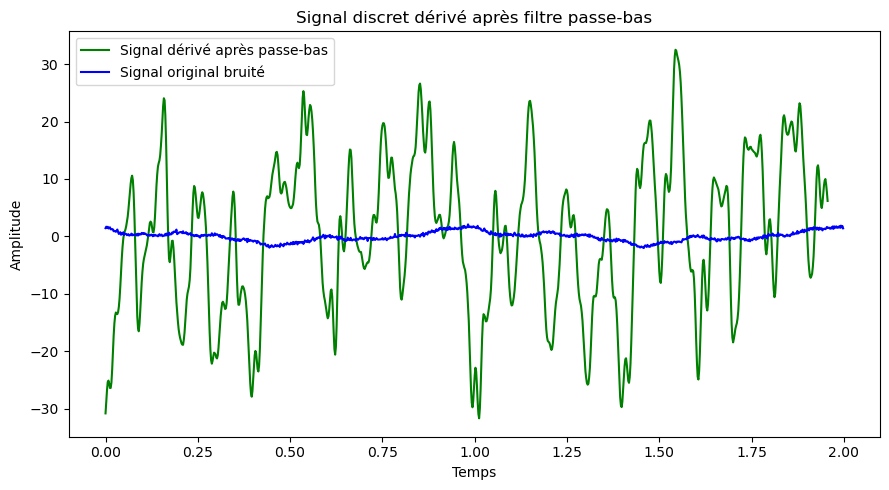

In [24]:
# filtre gaussien
s_filtre_passe_bas = convolve(s_bruit, reponse_impuls_passe_bas, mode='valid')
taille = s_filtre_passe_bas.size
t = (np.arange(taille) + Q) * t_e

# filtre dérivateur sur le signal filtré gaussien
s_filtre_deriv_apres_passe_bas = convolve(s_filtre_passe_bas, reponse_impuls_derivateur, mode='valid')
taille = s_filtre_deriv_apres_passe_bas.size
t = np.arange(taille) * t_e

plt.figure(figsize=(9, 5))
plt.plot(t, s_filtre_deriv_apres_passe_bas, label='Signal dérivé après passe-bas', color='green')
plt.plot(t_discret, s_bruit, label='Signal original bruité', color='blue')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title("Signal discret dérivé après filtre passe-bas")
plt.legend()
plt.tight_layout()
plt.show()

En appliquant d'abord un filtre passe-bas au signal bruité, les hautes fréquences (celles du bruit) sont significativement atténuées, ce qui réduit leur impact lors de la dérivation. 
Une fois le signal filtré, la dérivation met en évidence les variations plus lentes et significatives du signal utile.   
Cette approche permet donc de mieux extraire les caractéristiques essentielles du signal sans que le bruit ne domine de trop les résultats, rendant l'opération de dérivation bien mieux interprétable.  


---

## **Partie 3 / _Quelques exemples de filtres RIF à phase linéaire_**  


Les filtres RIF (Réponse Impulsionnelle Finie) à phase linéaire sont définis par la réponse fréquentielle :  
$$
H_e(f) = e^{-2i \pi Q f / f_e} R(f), \quad R(f) = \sum_{k=-Q}^{Q} r[k] e^{2i \pi k f / f_e}
$$
avec \(r[k] = r[-k]\) (fonction paire). Les coefficients \(r[k]\) sont donnés par :  
$$
r[k] = \frac{1}{f_e} \int_{0}^{f_e} R(w)e^{2\pi i k w / f_e} dw
$$  
Une fois les $r[k]$ calculés, la réponse fréquentielle peut être obtenue à partir des coefficients impulsionnels $h[n]$ comme : 

$$
H_e(f) = \sum_{n=0}^{2Q} h[n] e^{-2i \pi f n / f_e}
$$ 

où $h[n] = r[n-Q], \quad n = 0, \dots, 2Q$.

Nous considèrons quatre principaux filtres standards :
- Filtre passe-bas
- Filtre passe-haut
- Filtre passe-bande
- Filtre coupe-bande

Il sera question de deux types de fenêtrage (Hann et rectangulaire) pour comparer leur impact sur les ondulations dans la bande passante et la bande atténuée des filtres.


### **Implémentation d'un filtre RIF général** 

Commençons par définir une fonction `filtreRIFgeneral(g, P, fenetre)` qui permet de construire un filtre RIF d'ordre $ P $. 
Les coefficients de Fourier $ g[k] $ sont multipliés par une fenêtre spécifiée par l'argument `fenetre` pour minimiser les ondulations dans la réponse fréquentielle. 

In [25]:
def filtreRIFgeneral(g, P, fenetre):

    Q = P    
    if len(g) != 2*Q + 1:
        raise ValueError("La taille de g doit valoir 2Q + 1.")
    
    window = scipy.signal.get_window(fenetre, 2*Q + 1, True)  
    
    h = np.zeros(2*Q + 1)  
    h = g * window   
    
    return h

### **Implémentation de différents types de filtres** 


Dans cette question, nous définissons une fonction `filtreRIF` qui permet de construire des filtres RIF à phase linéaire selon les spécifications suivantes :
- **Types de filtres** : passe-bas, passe-haut, passe-bande, et coupe-bande.
- **Fréquences de coupure** : `a` et `b` (normalisées par $ f_e $).
- **Ordre du filtre** : défini par  `P`, avec $ Q = 2P + 1 $.
- **Fenêtrage** : différentes fenêtres peuvent être appliquées pour améliorer la réponse fréquentielle.

Les coefficients $ r[k] $ du filtre sont calculés en fonction du type, et une fenêtre est appliquée pour réduire les ondulations dans la bande passante et la bande atténuée.


In [26]:
def filtreRIF(type, a, b, P, fenetre):
    
    Q = P 
    r = np.zeros(2*Q + 1)
    
    if type == 'PasseBas':  
        for k in range(0, Q+1):
            r[Q + k] = 2 * a * np.sinc(2 * a * k)
            r[Q - k] = r[Q + k]

    elif type == 'PasseHaut':  
        r[Q] = 1 - 2 * a
        for k in range(1, Q+1):
            r[Q + k] = -2 * a * np.sinc(2 * a * k)
            r[Q - k] = r[Q + k]

    elif type == 'PasseBande': 
        r[Q] = 2 * (b - a)
        for k in range(1, Q+1):
            r[Q + k] = (np.sin(2 * k * b * np.pi) - np.sin(2 * k * a * np.pi)) / (k * np.pi)
            r[Q - k] = r[Q + k]

    elif type == 'CoupeBande':  
        r[Q] = 1 + 2 * (a - b)
        for k in range(1, Q+1):
            r[Q + k] = (np.sin(2 * k * a * np.pi) - np.sin(2 * k * b * np.pi)) / (k * np.pi)
            r[Q - k] = r[Q + k]

    else:
        raise ValueError("Type de filtre non reconnu.")
    
    return filtreRIFgeneral(r, P, fenetre)


### **Application des filtres** 

Nous allons tester les filtres précédemment définis sur le signal suivant :

$$ s(t) = \cos(2\pi t) + 0.5 \cos(4\pi t - 1.0) + 0.25 \cos(6\pi t + 0.6) $$

Ce signal est échantillonné avec une fréquence $ f_e = 50 $ sur l'intervalle $ [0, 5] $.


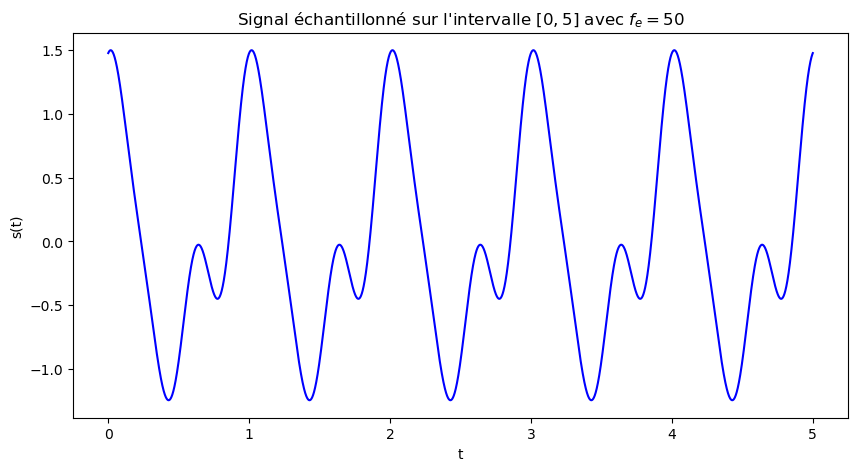

In [27]:
fe = 50 
te = 1 / fe
T = 5.0
t = np.linspace(0, T, 10000) 

def signal(t):
    return (np.cos(2 * np.pi * t) + 0.5 * np.cos(4 * np.pi * t - 1.0) + 0.25 * np.cos(6 * np.pi * t + 0.6))

plt.figure(figsize=(10, 5))
plt.plot(t, signal(t), color="blue")
plt.title(r"Signal échantillonné sur l'intervalle $[0, 5]$ avec $f_e = 50$")
plt.xlabel('t')
plt.ylabel('s(t)')
plt.show()

### $\hspace{0.4cm}$ **i) Filtrage passe-bas avec fréquence de coupure $ f_c = 1.0 $**

On considère un filtre passe-bas avec une fréquence de coupure \( f_c = 1.0 \) sur le signal échantillonné. 
Nous testons deux types de fenêtres : rectangulaire et de Hann, et comparons leurs réponses en fréquence. 
Le signal filtré sera comparé au signal d'origine.

L'ordre du filtre est donné par $ N = 2P + 1 $, et nous analysons les deux valeurs : $ P = 50 $ et $ P = 10 $. 


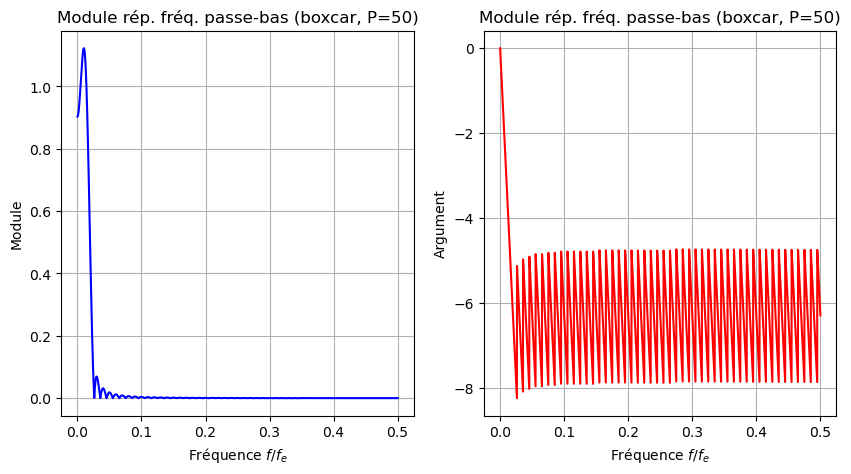

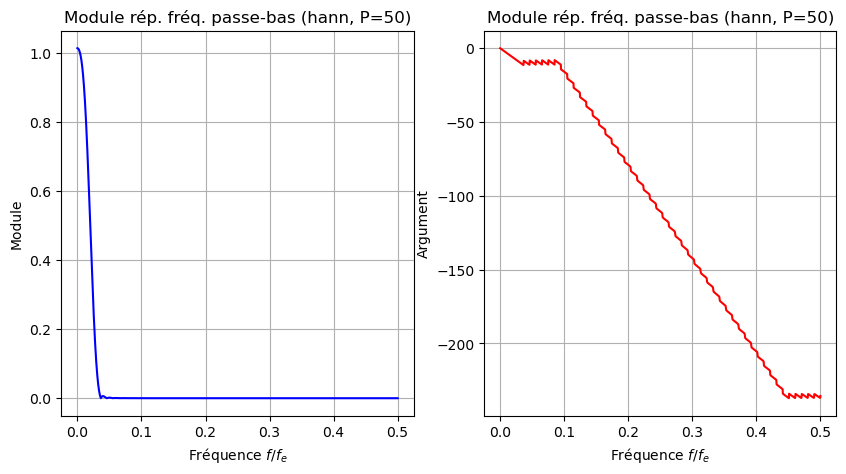

In [28]:
# Filtrage passe-bas avec P = 50
a = 1.0 / fe    # 1.0 = fréq coupure filtre passe-bas
b = 1.0 / fe

P = 50
fenetres = ['boxcar', 'hann'] 

for fenetre in fenetres:
        
    reponse_impuls_passe_bas = filtreRIF('PasseBas', a, b, P, fenetre)
    nf = 5000
    f_sur_fe = np.linspace(0, 0.5, nf)
    module, argument = ReponseFrequence(reponse_impuls_passe_bas, nf)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(f_sur_fe, module, color='blue')
    plt.xlabel("Fréquence $f / f_e$")
    plt.ylabel("Module")
    plt.title(f"Module rép. fréq. passe-bas ({fenetre}, P={P})")
    plt.grid('True')

    plt.subplot(1, 2, 2)
    plt.plot(f_sur_fe, argument, color='red')
    plt.xlabel("Fréquence $f / f_e$")
    plt.ylabel("Argument")
    plt.title(f"Module rép. fréq. passe-bas ({fenetre}, P={P})")
    plt.grid('True')


- La fenêtre rectangulaire (boxcar) génère des ondulations marquées dans la bande passante et dans la bande atténuée, dues à la troncature brutale du sinus cardinal. En utilisant la fenêtre de Hann, les ondulations sont atténuées, notamment dans la bande passante, ce qui améliore la qualité du filtre.  
- La phase, quant à elle, montre une linéarité bien respectée dans la bande passante pour la fenêtre boxcar, ce qui est crucial pour préserver la forme des signaux dont les harmoniques se situent dans cette bande. Cependant, pour la fenêtre de Hann, un déphasage plus marqué est constaté dans la bande passante, mais celui-ci décroît significativement avec l'augmentation de la fréquence, réduisant ainsi son influence sur les hautes fréquences.


En exprimant le gain en décibels ( $10\log_{10}$ ), les ondulations dans la bande atténuée sont mieux visibles.  

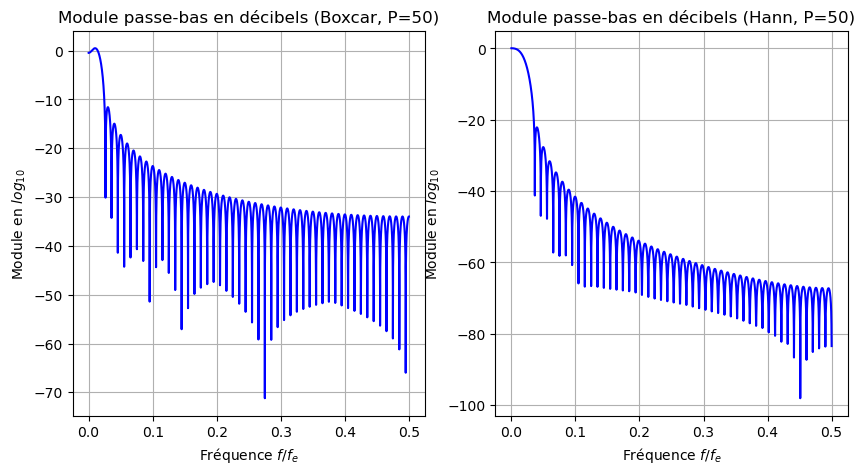

In [29]:
P = 50

reponse_impuls_passe_bas = filtreRIF('PasseBas', a, b, P, 'boxcar')
nf = 5000
f_sur_fe = np.linspace(0, 0.5, nf)
module, argument = ReponseFrequence(reponse_impuls_passe_bas, nf)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(f_sur_fe, 10 * np.log10(module), color='blue')
plt.xlabel("Fréquence $f / f_e$")
plt.ylabel(r"Module en $log_{10}$")
plt.title(f"Module passe-bas en décibels (Boxcar, P={P})")
plt.grid()

reponse_impuls_passe_bas = filtreRIF('PasseBas', a, b, P, 'hann')
nf = 5000
f_sur_fe = np.linspace(0, 0.5, nf)
module, argument = ReponseFrequence(reponse_impuls_passe_bas, nf)

plt.subplot(1, 2, 2)
plt.plot(f_sur_fe, 10 * np.log10(module), color='blue')
plt.xlabel("Fréquence $f / f_e$")
plt.ylabel(r"Module en $log_{10}$")
plt.title(f"Module passe-bas en décibels (Hann, P={P})")
plt.grid()

Pour la fenêtre rectangulaire, les ondulations dépassent des niveaux acceptables, rendant le filtre moins performant.  
La fenêtre de Hann réduit significativement ces ondulations, les plaçant sous un seuil de -20 dB, ce qui reste négligeable pour la plupart des applications pratiques.  


Représentons les signaux filtrés accompagnés du signal d'origine pour les deux fenêtres.

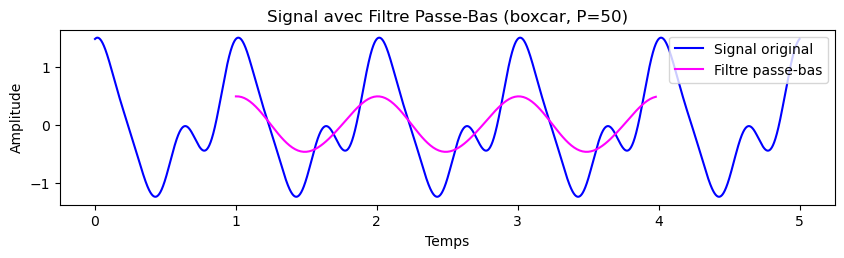

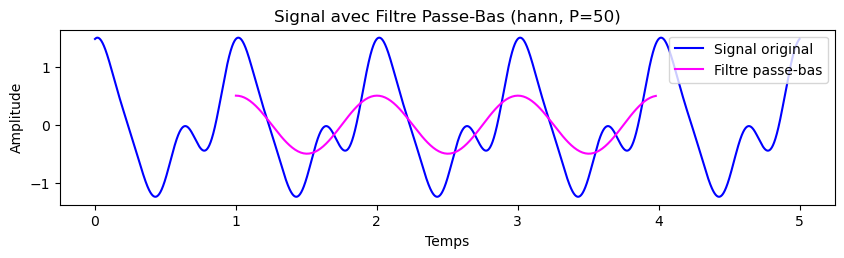

In [30]:
P = 50

for fenetre in fenetres:
    
    t_continu = np.linspace(0, T, 10000)
    
    reponse_impuls_passe_bas = filtreRIF('PasseBas', a, None, P, fenetre)

    t_discret = np.arange(0, T, te) 
    signal_filtre_passe_bas = convolve(signal(t_discret), reponse_impuls_passe_bas, mode='valid')
    taille = signal_filtre_passe_bas.size
    t = (np.arange(taille) + P) * te

    plt.figure(figsize=(10,5))
    
    plt.subplot(2, 1, 1)
    plt.plot(t_continu, signal(t_continu), label='Signal original', color="blue")
    plt.plot(t, signal_filtre_passe_bas, label=f'Filtre passe-bas', color="magenta")
    plt.legend()
    plt.title(f"Signal avec Filtre Passe-Bas ({fenetre}, P={P})")
    plt.xlabel('Temps')
    plt.ylabel('Amplitude')

Les deux filtres réduisent significativement les amplitudes les plus élevées du signal. Cette réduction est due à l'atténuation des composantes de haute fréquence, particulièrement marquées par rapport aux basses fréquences. 
Par conséquent, la structure globale du signal est modifiée : les variations rapides sont adoucies, ce qui met davantage en évidence les composantes de basse fréquence. 


Évaluons désormais l'impact d'une diminution du paramètre $P$ de $50$ à $10$.

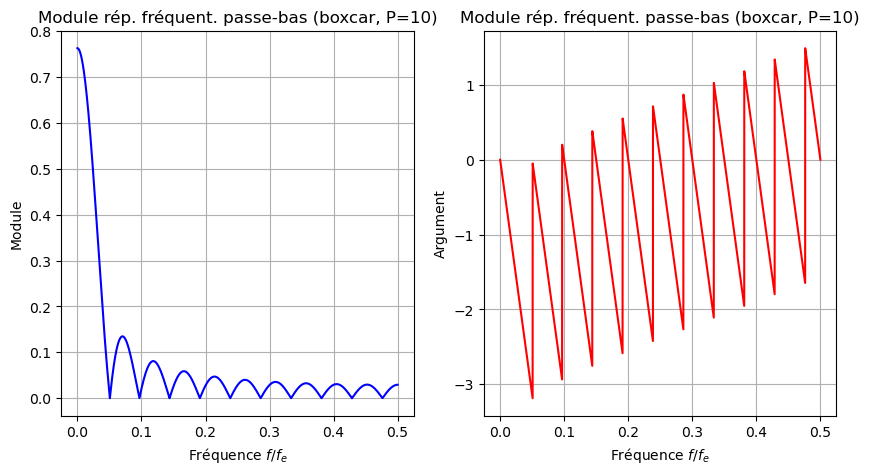

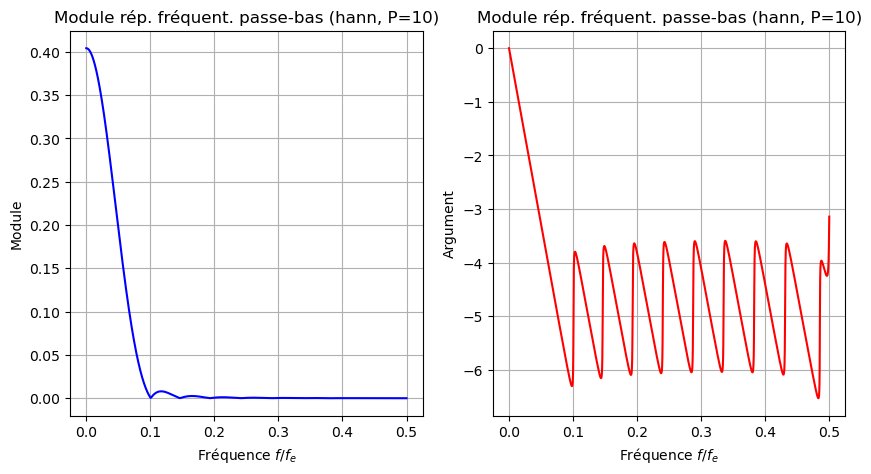

In [31]:
P = 10
nf = 5000
fenetres = ['boxcar', 'hann'] 

for fenetre in fenetres:
        
    reponse_impuls_passe_bas = filtreRIF('PasseBas', a, b, P, fenetre)
    f_sur_fe = np.linspace(0, 0.5, nf)
    module, argument = ReponseFrequence(reponse_impuls_passe_bas, nf)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(f_sur_fe, module, color='blue')
    plt.xlabel("Fréquence $f / f_e$")
    plt.ylabel("Module")
    plt.title(f"Module rép. fréquent. passe-bas ({fenetre}, P={P})")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(f_sur_fe, argument, color='red')
    plt.xlabel("Fréquence $f / f_e$")
    plt.ylabel("Argument")
    plt.title(f"Module rép. fréquent. passe-bas ({fenetre}, P={P})")
    plt.grid()


En diminuant l’indice $ P $, la réponse fréquentielle est beaucoup moins proche de l’idéal.  
- La fenêtre rectangulaire amplifie davantage les ondulations, tandis que la fenêtre de Hann continue de les atténuer, bien qu’avec une efficacité moindre comparé à $ P = 50 $.  
- L'atténuation dans la bande passante est inférieure à 1, ce qui peut entraîner une perte d’amplitude dans les signaux utiles, particulièrement dans la transition entre la bande passante et la bande atténuée.

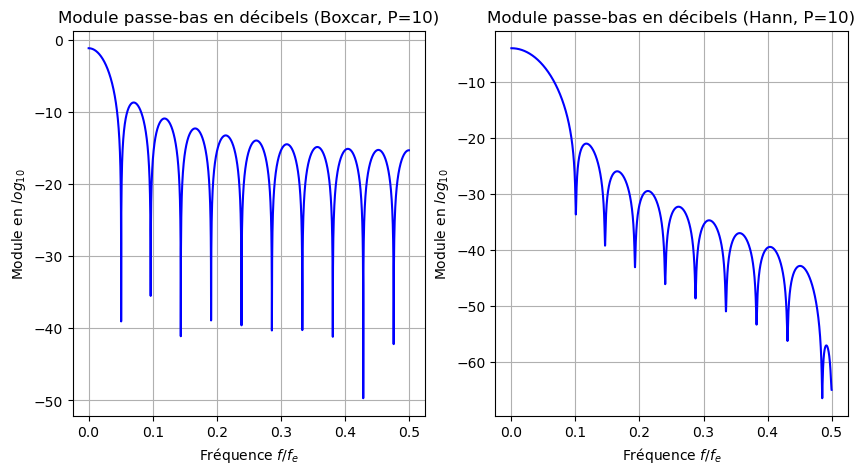

In [32]:
P = 10
nf = 5000

reponse_impuls_passe_bas = filtreRIF('PasseBas', a, b, P, 'boxcar')
module, argument = ReponseFrequence(reponse_impuls_passe_bas, nf)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, 0.5, nf), 10 * np.log10(module), color='blue')
plt.xlabel("Fréquence $f / f_e$")
plt.ylabel(r"Module en $log_{10}$")
plt.title(f"Module passe-bas en décibels (Boxcar, P={P})")
plt.grid()

reponse_impuls_passe_bas = filtreRIF('PasseBas', a, b, P, 'hann')
nf = 5000
module, argument = ReponseFrequence(reponse_impuls_passe_bas, nf)

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, 0.5, nf), 10 * np.log10(module), color='blue')
plt.xlabel("Fréquence $f / f_e$")
plt.ylabel(r"Module en $log_{10}$")
plt.title(f"Module passe-bas en décibels (Hann, P={P})")
plt.grid()

Les affichages des modules en $log_{10}$ confirment les remarques précédentes. La fenêtre de Hann reste plus efficace que la fenêtre rectangulaire, mais les ondulations dans la bande atténuée sont plus élevées que pour $ P = 50 $.


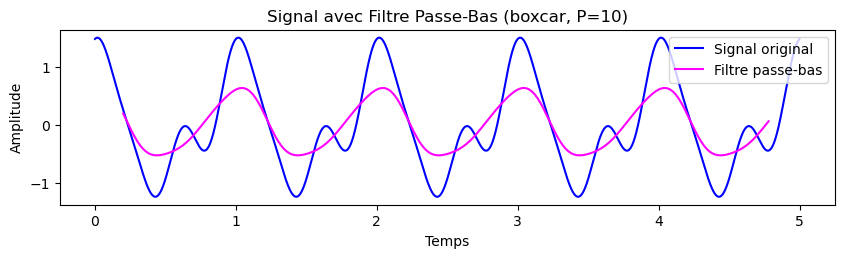

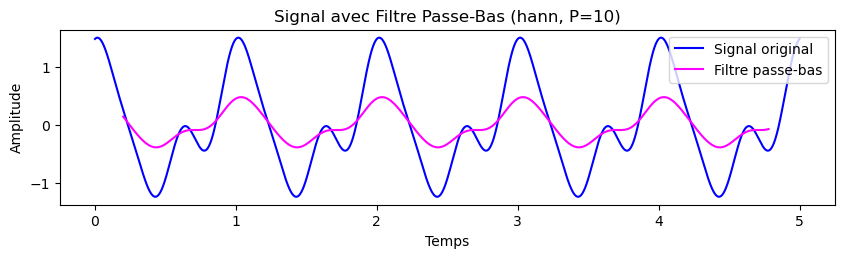

In [33]:
P = 10
t = np.linspace(0, T, 10000)
for fenetre in fenetres:

    t_continu = np.linspace(0, T, 10000)
    reponse_impuls_passe_bas = filtreRIF('PasseBas', a, None, P, fenetre)
    t_discret = np.arange(0, T, te) 
    signal_filtre_passe_bas = convolve(signal(t_discret), reponse_impuls_passe_bas, mode='valid')
    taille = signal_filtre_passe_bas.size
    t = (np.arange(taille) + P) * te

    plt.figure(figsize=(10,5))
    plt.subplot(2, 1, 1)
    plt.plot(t_continu, signal(t_continu), label='Signal original', color="blue")
    plt.plot(t, signal_filtre_passe_bas, label=f'Filtre passe-bas', color="magenta")
    plt.legend()
    plt.title(f"Signal avec Filtre Passe-Bas ({fenetre}, P={P})")
    plt.xlabel('Temps')
    plt.ylabel('Amplitude')

Lorsque l'indice $ P $ est faible, le filtre devient nettement moins performant. La sélectivité diminue, avec une transition plus large entre la bande passante et la bande atténuée. 
De plus, le filtre entraîne une perte d’amplitude pour les signaux utiles. 

Avec un indice $ P $ élevé, le filtre offre une réponse plus fidèle à l’idéal. On obtient une meilleure sélectivité, une atténuation efficace dans la bande rejetée, et un gain correct dans la bande passante. 

Si $ P $ ne peut pas être augmenté, réduire la fréquence d’échantillonnage permet d’augmenter le coefficient $ a $ et d’améliorer les performances du filtre.

En résumé, un bon équilibre entre l'ordre du filtre, le choix de la fenêtre, et la fréquence d’échantillonnage est essentiel pour concevoir un filtre efficace et performant.

### $\hspace{0.4cm}$  **ii) Filtrage passe-bande et coupe-bande**

Dans cette partie, nous testons deux types de filtre : **passe-bande** et **coupe-bande**. On fixe les paramètres $ a = 1.5 $, $ b = 2.5 $ et un ordre de filtre de $ P = 50 $.

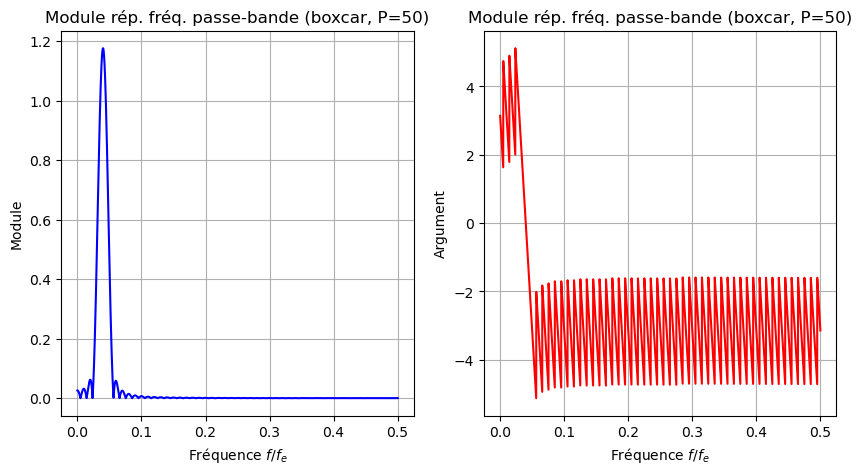

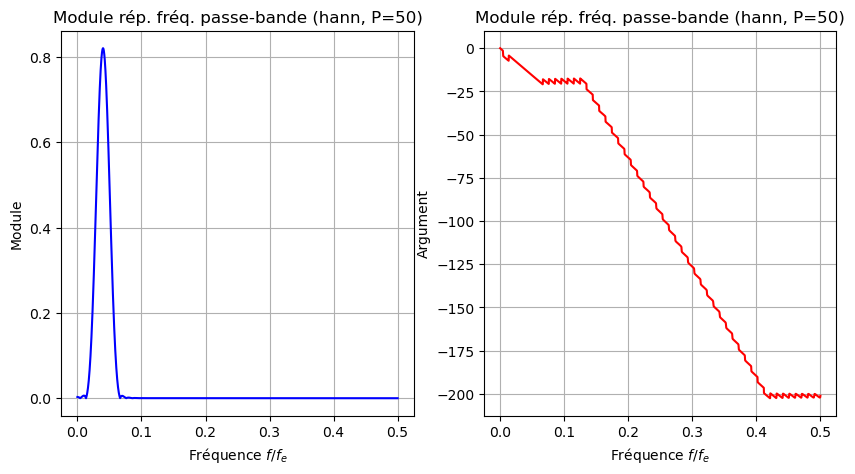

In [34]:
# Filtrage passe-bande avec P=50
a = 1.5  
b = 2.5   
P = 50
fenetres = ['boxcar', 'hann'] 

for fenetre in fenetres:
        
    reponse_impuls_passe_bande = filtreRIF('PasseBande', a/fe, b/fe, P, fenetre)
    nf = 5000
    f_sur_fe = np.linspace(0, 0.5, nf)
    module, argument = ReponseFrequence(reponse_impuls_passe_bande, nf)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(f_sur_fe, module, color='blue')
    plt.xlabel("Fréquence $f / f_e$")
    plt.ylabel("Module")
    plt.title(f"Module rép. fréq. passe-bande ({fenetre}, P={P})")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(f_sur_fe, argument, color='red')
    plt.xlabel("Fréquence $f / f_e$")
    plt.ylabel("Argument")
    plt.title(f"Module rép. fréq. passe-bande ({fenetre}, P={P})")
    plt.grid()

Les deux fenêtres assurent une transmission correcte des composantes de la bande passante. La fenêtre rectangulaire conserve mieux l’énergie du signal, tandis que la fenêtre de Hann offre une meilleure atténuation des fréquences hors bande, avec une légère réduction de l’amplitude du signal.

La phase de la fenêtre rectangulaire présente des irrégularités qui peuvent nuire à la fidélité temporelle, tandis que la fenêtre de Hann assure une phase plus régulière, réduisant les distorsions.

La fenêtre rectangulaire préserve mieux l'énergie du signal, mais avec moins de suppression des fréquences indésirables. La seconde offre un filtrage plus efficace, particulièrement utile pour éliminer les composantes non désirées.


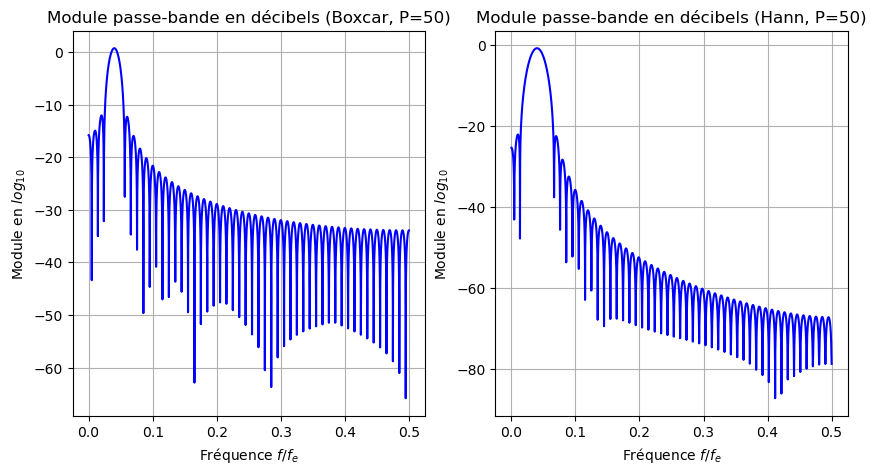

In [35]:
P = 50

reponse_impuls_passe_bande = filtreRIF('PasseBande', a/fe, b/fe, P, 'boxcar')
nf = 5000
module, argument = ReponseFrequence(reponse_impuls_passe_bande, nf)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, 0.5, nf), 10 * np.log10(module), color='blue')
plt.xlabel("Fréquence $f / f_e$")
plt.ylabel(r"Module en $log_{10}$")
plt.title(f"Module passe-bande en décibels (Boxcar, P={P})")
plt.grid()

reponse_impuls_passe_bande = filtreRIF('PasseBande', a/fe, b/fe, P, 'hann')
nf = 5000
module, argument = ReponseFrequence(reponse_impuls_passe_bande, nf)

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, 0.5, nf), 10 * np.log10(module), color='blue')
plt.xlabel("Fréquence $f / f_e$")
plt.ylabel(r"Module en $log_{10}$")
plt.title(f"Module passe-bande en décibels (Hann, P={P})")
plt.grid()

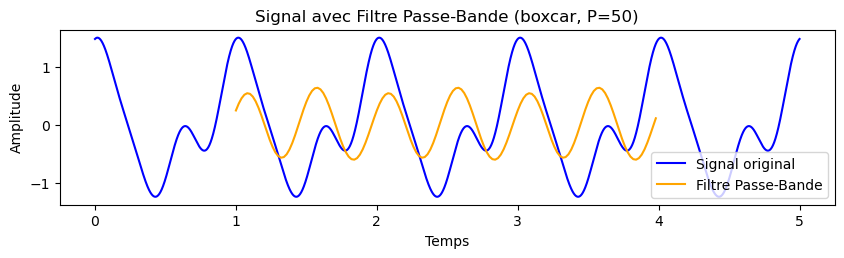

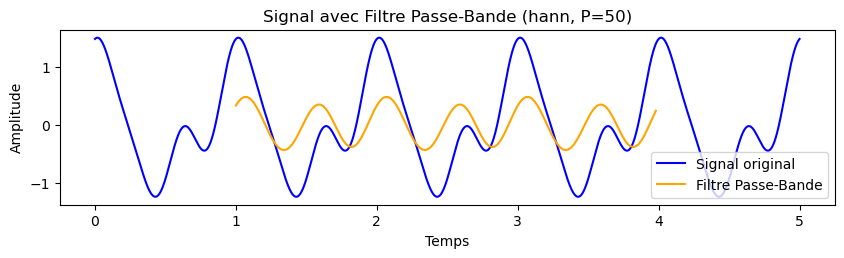

In [36]:
P = 50
T = 5.0

for fenetre in fenetres:

    t_continu = np.linspace(0, T, 10000)
    
    reponse_impuls_passe_bande = filtreRIF('PasseBande', a/fe, b/fe, P, fenetre)
    t_discret = np.arange(0, T, te) 
    signal_filtre_passe_bande = convolve(signal(t_discret), reponse_impuls_passe_bande, mode='valid')
    taille = signal_filtre_passe_bande.size
    t = (np.arange(taille) + P) * te

    plt.figure(figsize=(10,5))
    plt.subplot(2, 1, 1)
    plt.plot(t_continu, signal(t_continu), label='Signal original', color="blue")
    plt.plot(t, signal_filtre_passe_bande, label=f'Filtre Passe-Bande', color="orange")
    plt.legend()
    plt.title(f"Signal avec Filtre Passe-Bande ({fenetre}, P={P})")
    plt.xlabel('Temps')
    plt.ylabel('Amplitude')

Les deux fenêtres montrent une phase temporelle similaire, ce qui indique que les composantes fréquentielles de la bande passante sont correctement transmises sans décalage temporel majeur. Cela démontre une performance équivalente pour les deux types de fenêtre sur cet aspect.

La rectangulaire conserve une amplitude plus proche du signal original par rapport à la fenêtre de Hann. Cela suggère qu’elle préserve davantage l’énergie du signal dans la bande passante, bien qu’elle soit moins performante dans la suppression des ondulations. La fenêtre de Hann offre un meilleur filtrage en réduisant les distorsions et les fréquences indésirables.

Le choix entre ces fenêtres dépend des priorités : précision dans la bande passante ou atténuation optimale des composantes hors bande. 

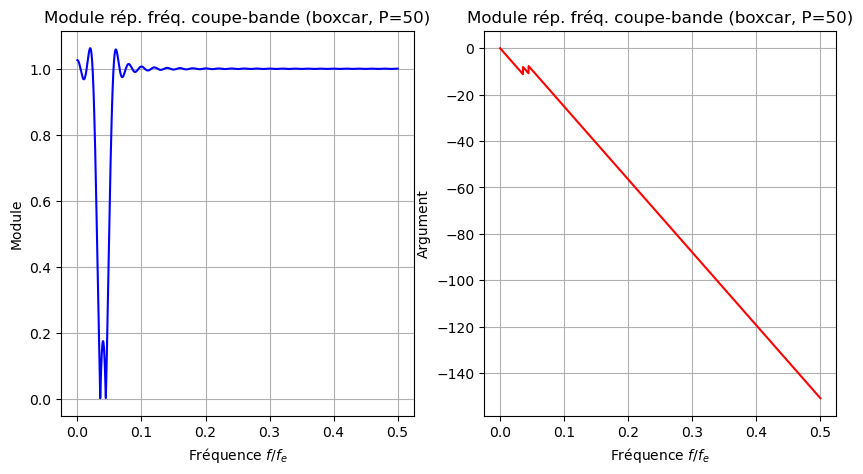

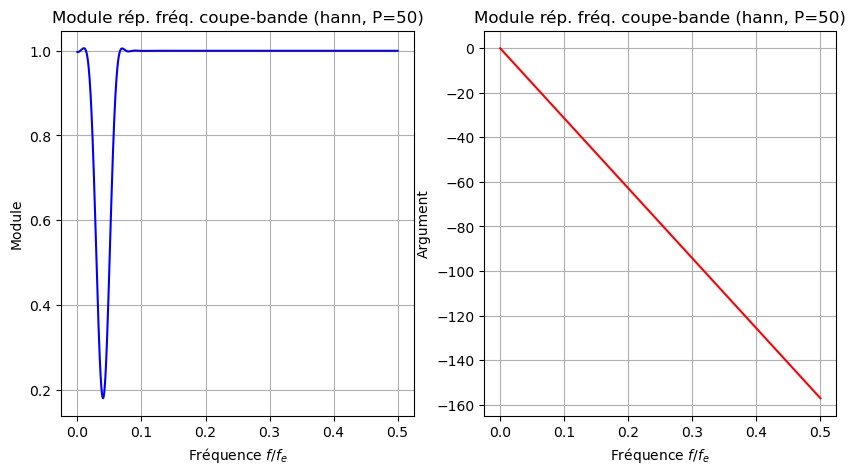

In [37]:
# Filtrage coupe-bande avec P=50
a = 1.5  
b = 2.5   
P = 50
fenetres = ['boxcar', 'hann'] 

for fenetre in fenetres:
        
    reponse_impuls_coupe_bande = filtreRIF('CoupeBande', a/fe, b/fe, P, fenetre)
    nf = 5000
    f_sur_fe = np.linspace(0, 0.5, nf)
    module, argument = ReponseFrequence(reponse_impuls_coupe_bande, nf)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(f_sur_fe, module, color='blue')
    plt.xlabel("Fréquence $f / f_e$")
    plt.ylabel("Module")
    plt.title(f"Module rép. fréq. coupe-bande ({fenetre}, P={P})")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(f_sur_fe, argument, color='red')
    plt.xlabel("Fréquence $f / f_e$")
    plt.ylabel("Argument")
    plt.title(f"Module rép. fréq. coupe-bande ({fenetre}, P={P})")
    plt.grid()

Les deux fenêtres montrent une décroissance suivie d'une remontée du module, mais la fenêtre rectangulaire présente des ondulations mineures, indiquant une atténuation moins uniforme. La fenêtre de Hann, quant à elle, assure une variation plus régulière, offrant ainsi une meilleure stabilité dans l'atténuation des fréquences non désirées.

La phase décroît linéairement dans les deux cas, mais avec des irrégularités au début pour la fenêtre rectangulaire, tandis que la fenêtre de Hann offre une décroissance plus fluide, réduisant ainsi les distorsions temporelles et préservant mieux la fidélité du signal.


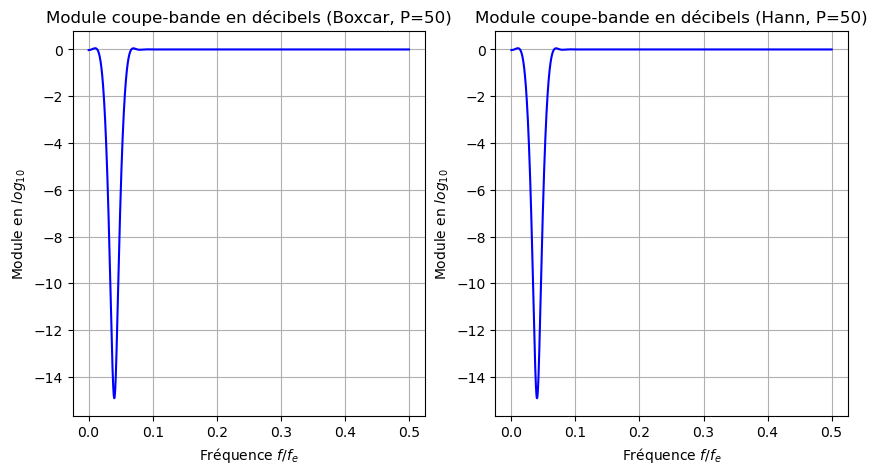

In [38]:
reponse_impuls_coupe_bande = filtreRIF('CoupeBande', a/fe, b/fe, P, fenetre)
nf = 5000
module, argument = ReponseFrequence(reponse_impuls_coupe_bande, nf)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, 0.5, nf), 20 * np.log10(module), color='blue')
plt.xlabel("Fréquence $f / f_e$")
plt.ylabel(r"Module en $log_{10}$")
plt.title(f"Module coupe-bande en décibels (Boxcar, P={P})")
plt.grid()

reponse_impuls_coupe_bande = filtreRIF('CoupeBande', a/fe, b/fe, P, fenetre)
nf = 5000
module, argument = ReponseFrequence(reponse_impuls_coupe_bande, nf)

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, 0.5, nf), 20 * np.log10(module), color='blue')
plt.xlabel("Fréquence $f / f_e$")
plt.ylabel(r"Module en $log_{10}$")
plt.title(f"Module coupe-bande en décibels (Hann, P={P})")
plt.grid()

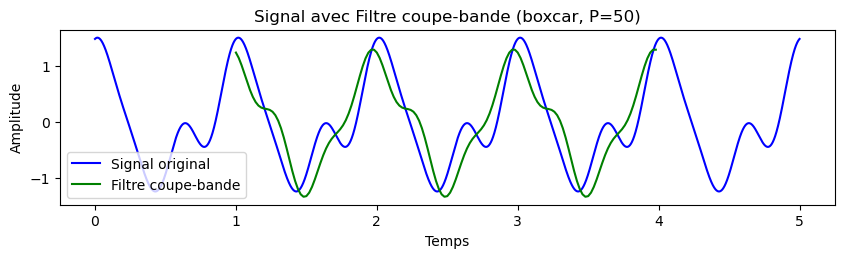

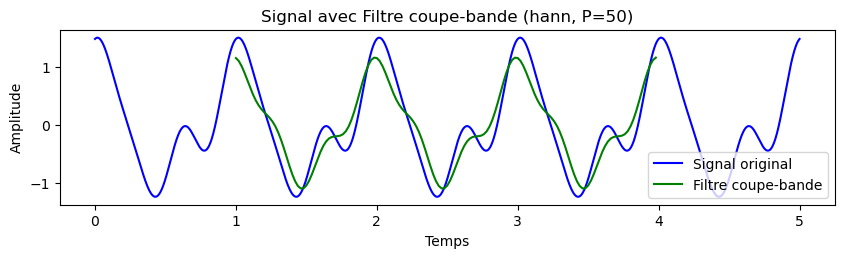

In [39]:
P = 50
T = 5.0

for fenetre in fenetres:

    t_continu = np.linspace(0, T, 10000)
    
    reponse_impuls_coupe_bande = filtreRIF('CoupeBande', a/fe, b/fe, P, fenetre)
    t_discret = np.arange(0, T, te) 
    signal_filtre_coupe_bande = convolve(signal(t_discret), reponse_impuls_coupe_bande, mode='valid')
    taille = signal_filtre_coupe_bande.size
    t = (np.arange(taille) + P) * te
    
    plt.figure(figsize=(10,5))
    plt.subplot(2, 1, 1)
    plt.plot(t_continu, signal(t_continu), label='Signal original', color="blue")
    plt.plot(t, signal_filtre_coupe_bande, label=f'Filtre coupe-bande', color="green")
    plt.legend()
    plt.title(f"Signal avec Filtre coupe-bande ({fenetre}, P={P})")
    plt.xlabel('Temps')
    plt.ylabel('Amplitude')

Avant d'interpréter les résultats, notons que le signal original périodique présente des oscillations d'amplitude distinctes, avec des montées et descentes variées. 

Pour le filtre coupe-bande avec la fenêtre rectangulaire, le signal filtré présente un léger retard de phase mais conserve une amplitude proche de l'original. Cependant, la courte décroissance de l'amplitude du signal est moins perceptible, car la croissance du filtre est légèrement ralentie sans marquer clairement cette transition. Cela reflète une atténuation inégale, entraînant une perte de précision dans la gestion des variations d'amplitude rapides.

Avec la fenêtre de Hann, le signal filtré est mieux synchronisé, mais l'amplitude est plus resserrée que l'original. La courte descente de l'amplitude est plus visible, avec la courbe qui se stabilise après la montée, marquant une meilleure capture de cette transition. Cela montre que la fenêtre de Hann gère mieux les variations fines du signal, tout en offrant un filtrage plus précis avec une meilleure suppression des composantes indésirables.


---

## **_Synthèse du projet_**


Ce projet a exploré l’échantillonnage d'un signal, en mettant en évidence l'importance du respect du théorème de Shannon pour éviter le repliement de la bande (aliasing). Ce phénomène cause une distorsion du signal, notamment par l'apparition de basses fréquences parasites.

Différents types de filtres ont été analysés, dont le filtre gaussien, moyenneur, sinc, et dérivateur. Chaque filtre a ses avantages, avec le filtre gaussien offrant une meilleure sélectivité et suppression du bruit, tandis que le filtre dérivateur a montré ses limites en termes de précision.

L’étude s’est également penchée sur les filtres à réponse impulsionnelle finie (RIF), en particulier les filtres passe-bas, passe-bande et coupe-bande. Ces filtres permettent d’éliminer des fréquences spécifiques, mais leur efficacité dépend du compromis entre la largeur de bande, l’atténuation des fréquences indésirables et la distorsion introduite.

Enfin, ce travail a mis en évidence l’influence du choix de la fréquence d’échantillonnage, de l’ordre du filtre et de la fenêtre d’application sur la qualité du filtrage. Une bonne conception de ces paramètres est essentielle pour garantir un traitement du signal optimal et fidèle aux caractéristiques du signal d’origine.